# KELOMPOK 39

kaggle : https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

In [ ]:
!pip install optuna xgboost lightgbm catboost scikit-plot imbalanced-learn mlxtend


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path = './fraudTrain.csv'
test_path = './fraudTest.csv'

# Load dengan chunks jika data terlalu besar
chunk_size = 100000
train_chunks = pd.read_csv(train_path, chunksize=chunk_size)
test_chunks = pd.read_csv(test_path, chunksize=chunk_size)

# Gabungkan chunks
train_df = pd.concat(train_chunks, ignore_index=True)
test_df = pd.concat(test_chunks, ignore_index=True)


## EDA

In [ ]:
train_df.duplicated().sum()
test_df.duplicated().sum()

np.int64(0)

Starting Comprehensive EDA...
COMPREHENSIVE EXPLORATORY DATA ANALYSIS

1. BASIC DATASET INFORMATION
----------------------------------------
Train dataset shape: (1296675, 23)
Test dataset shape: (555719, 23)

Train dataset columns:
['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   am

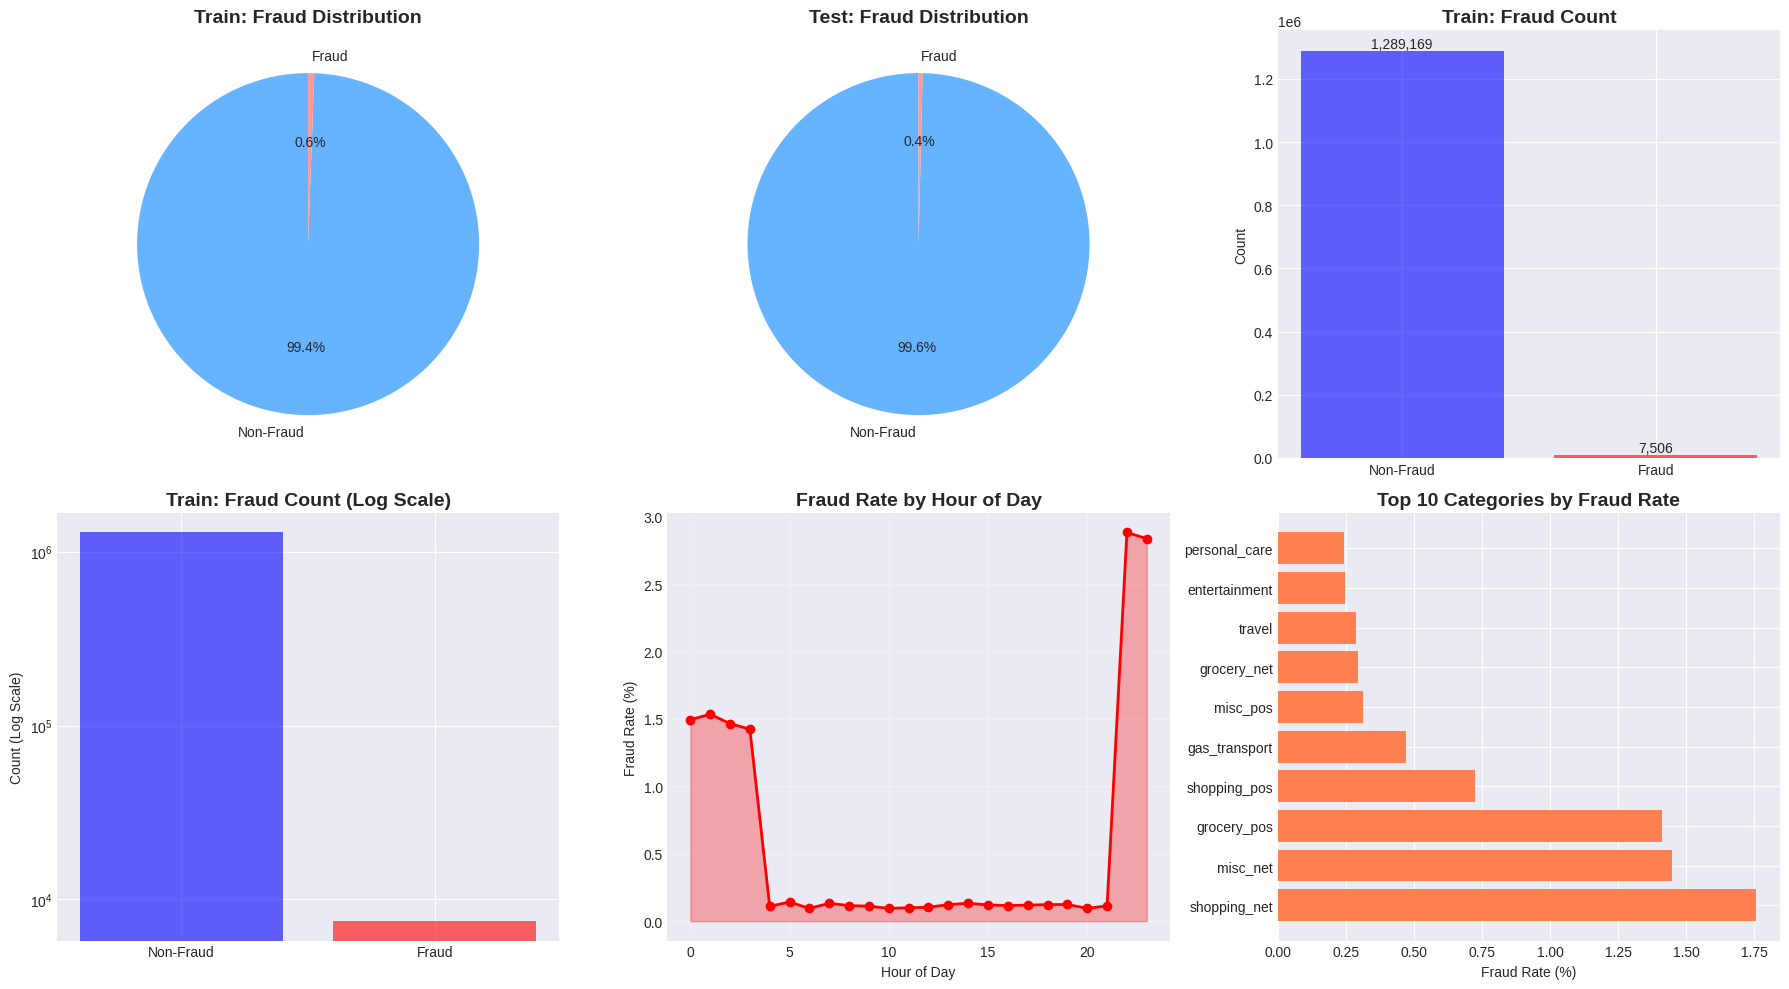



4. CORRELATION ANALYSIS WITH HEATMAP
----------------------------------------
Found 12 numeric columns


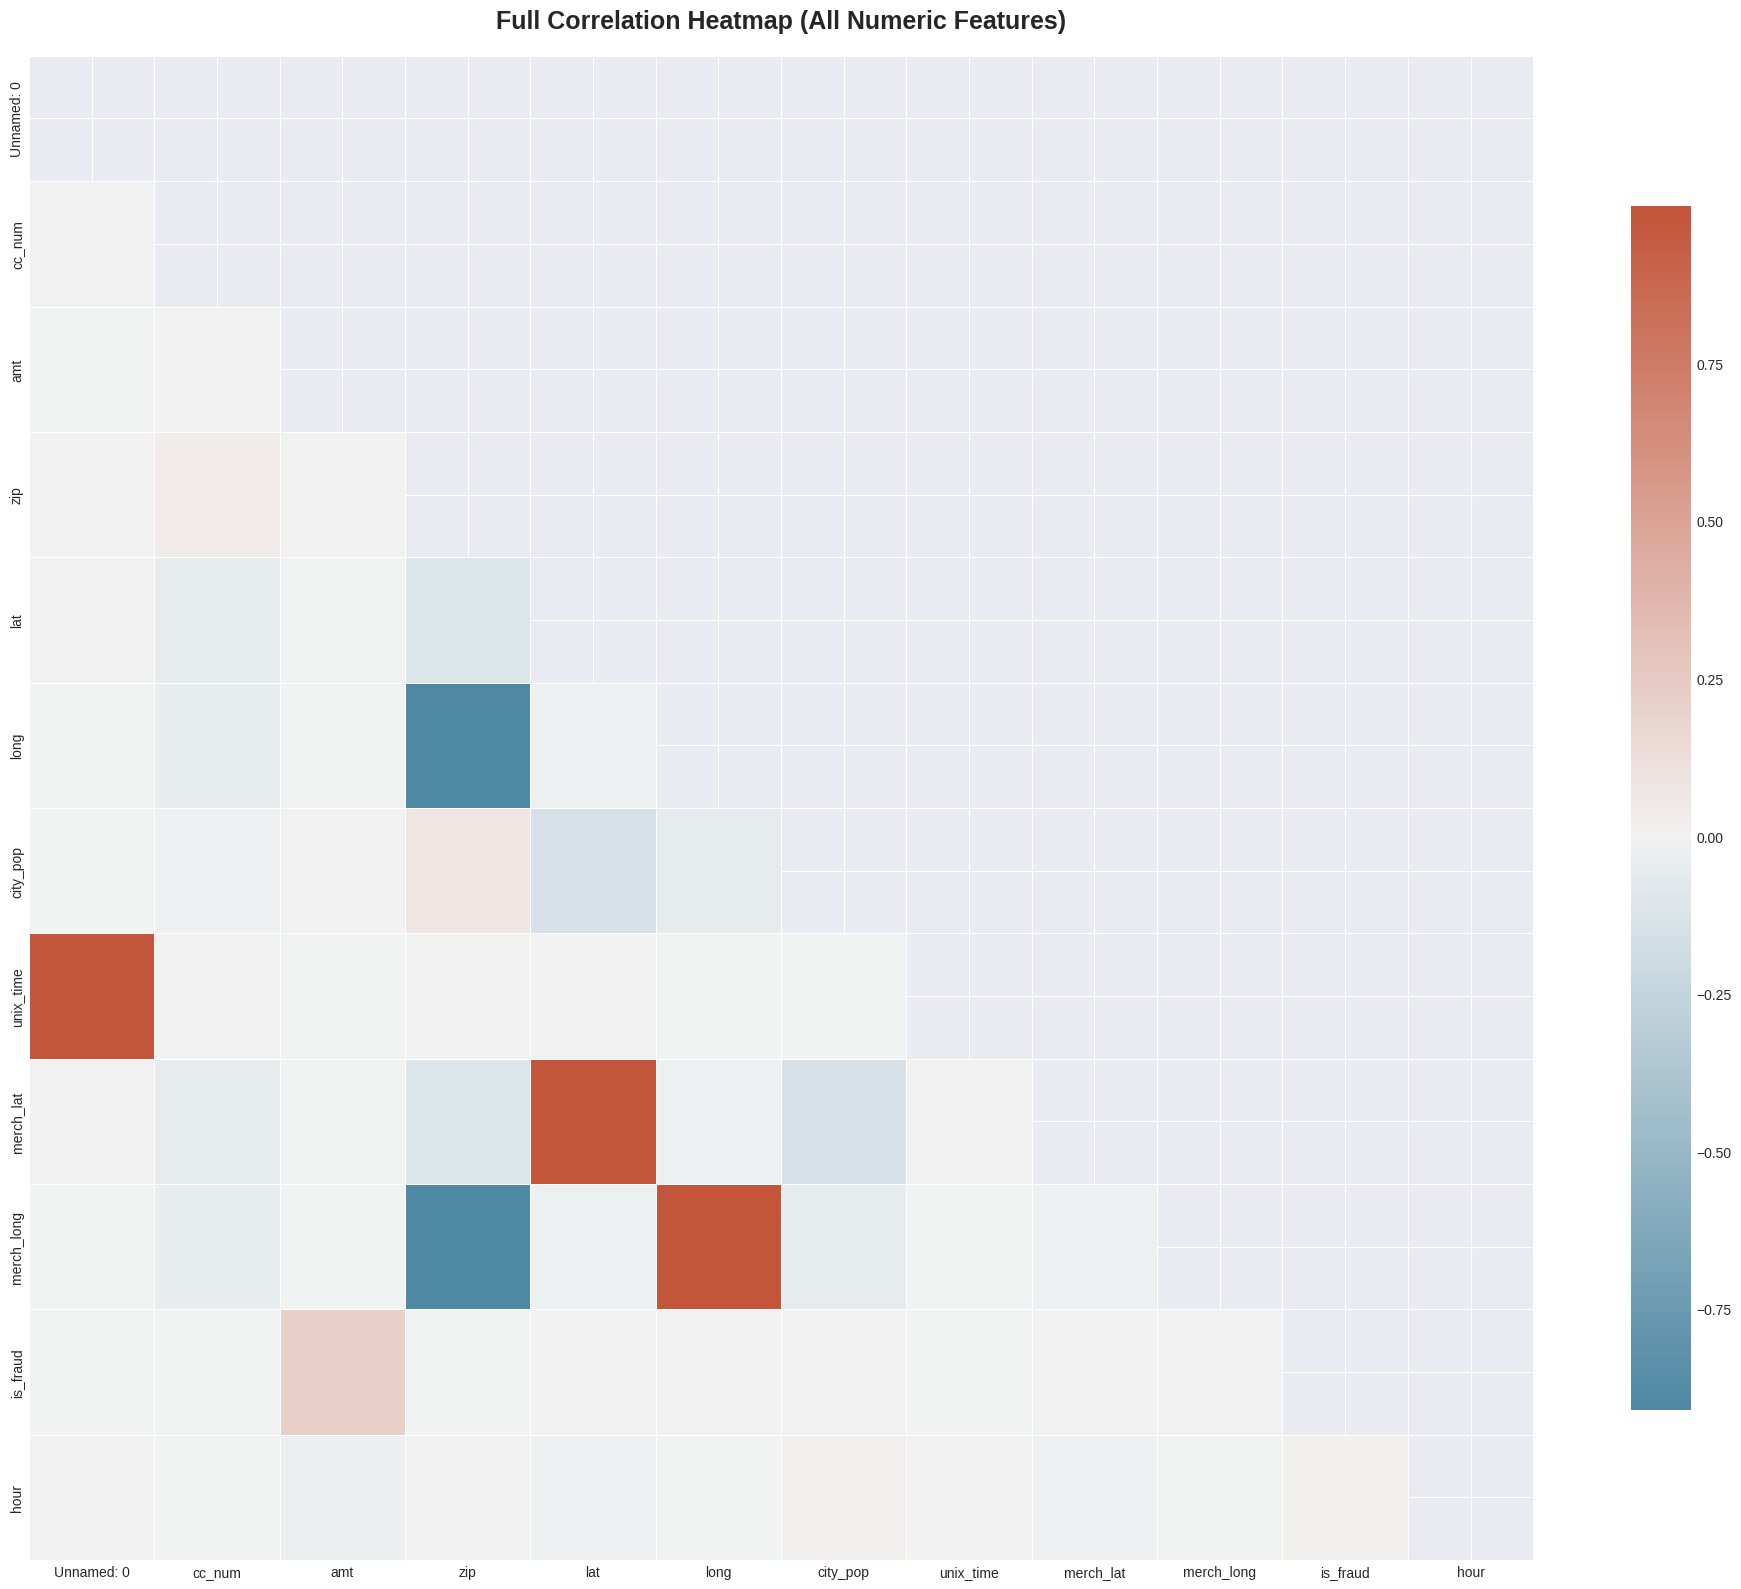


Top 10 features positively correlated with fraud:
is_fraud      1.000000
amt           0.219404
hour          0.013799
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
cc_num       -0.000981
zip          -0.002162
Name: is_fraud, dtype: float64

Top 10 features negatively correlated with fraud:
hour          0.013799
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
cc_num       -0.000981
zip          -0.002162
Unnamed: 0   -0.004767
unix_time    -0.005078
Name: is_fraud, dtype: float64


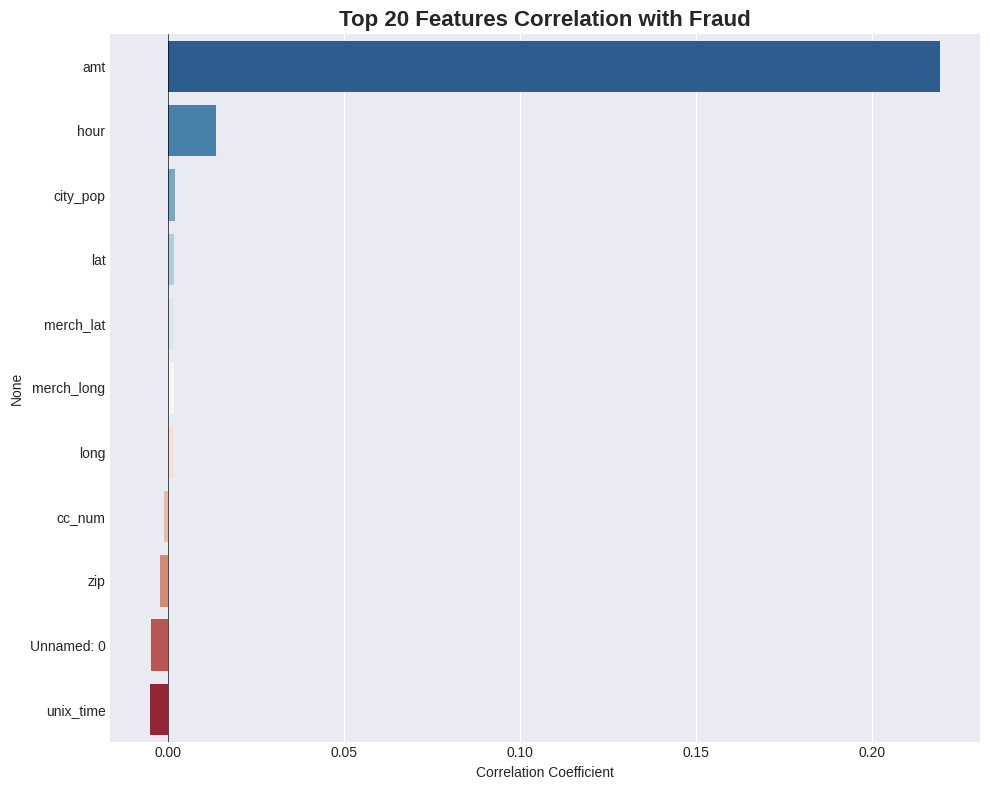

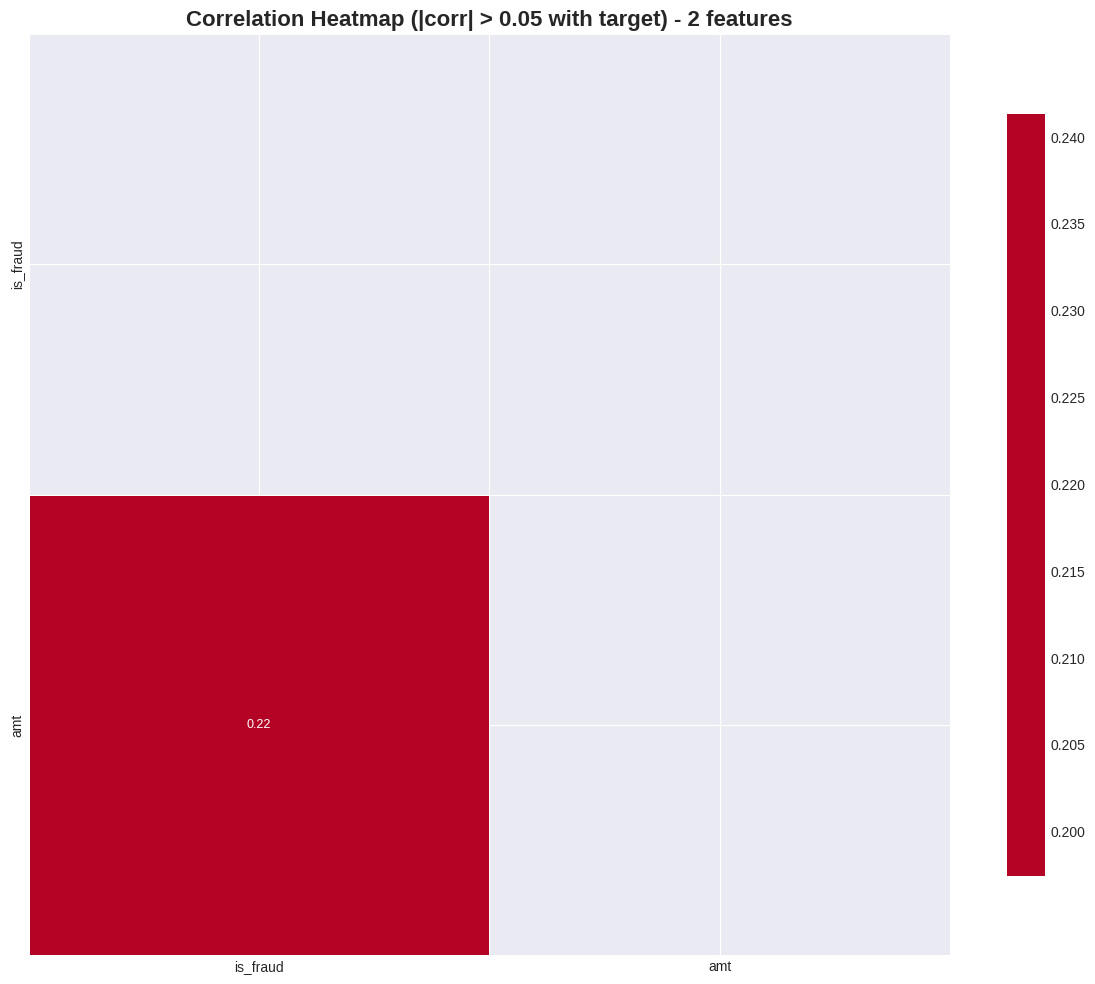



5. CATEGORICAL VARIABLES ANALYSIS
----------------------------------------
Found 11 categorical columns

merchant:
  Unique values: 693

category:
  Unique values: 14
  Value counts:
category
gas_transport    131659
grocery_pos      123638
home             123115
shopping_pos     116672
kids_pets        113035
Name: count, dtype: int64

first:
  Unique values: 352

last:
  Unique values: 481

gender:
  Unique values: 2
  Value counts:
gender
F    709863
M    586812
Name: count, dtype: int64

street:
  Unique values: 983

city:
  Unique values: 894

state:
  Unique values: 51

job:
  Unique values: 494

dob:
  Unique values: 968

trans_num:
  Unique values: 1296675


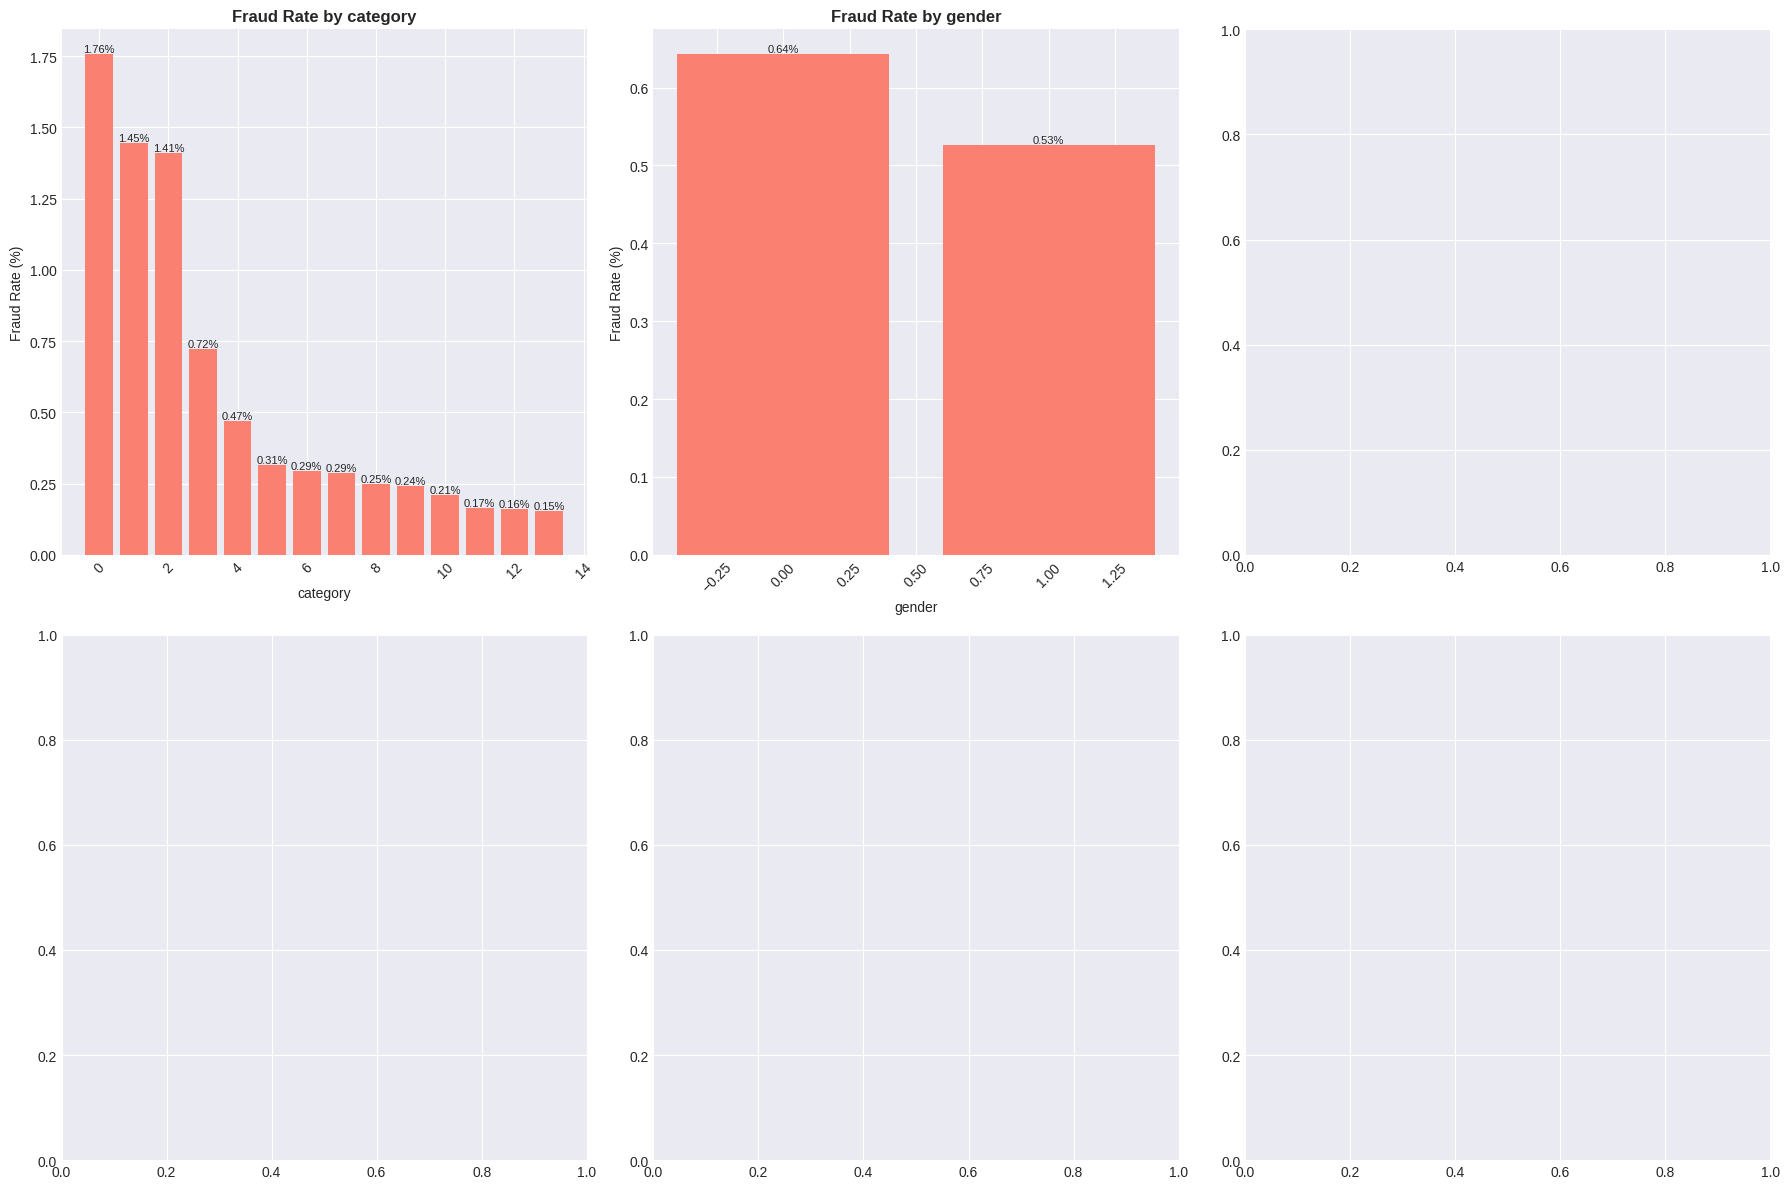



6. NUMERICAL VARIABLES DISTRIBUTION
----------------------------------------


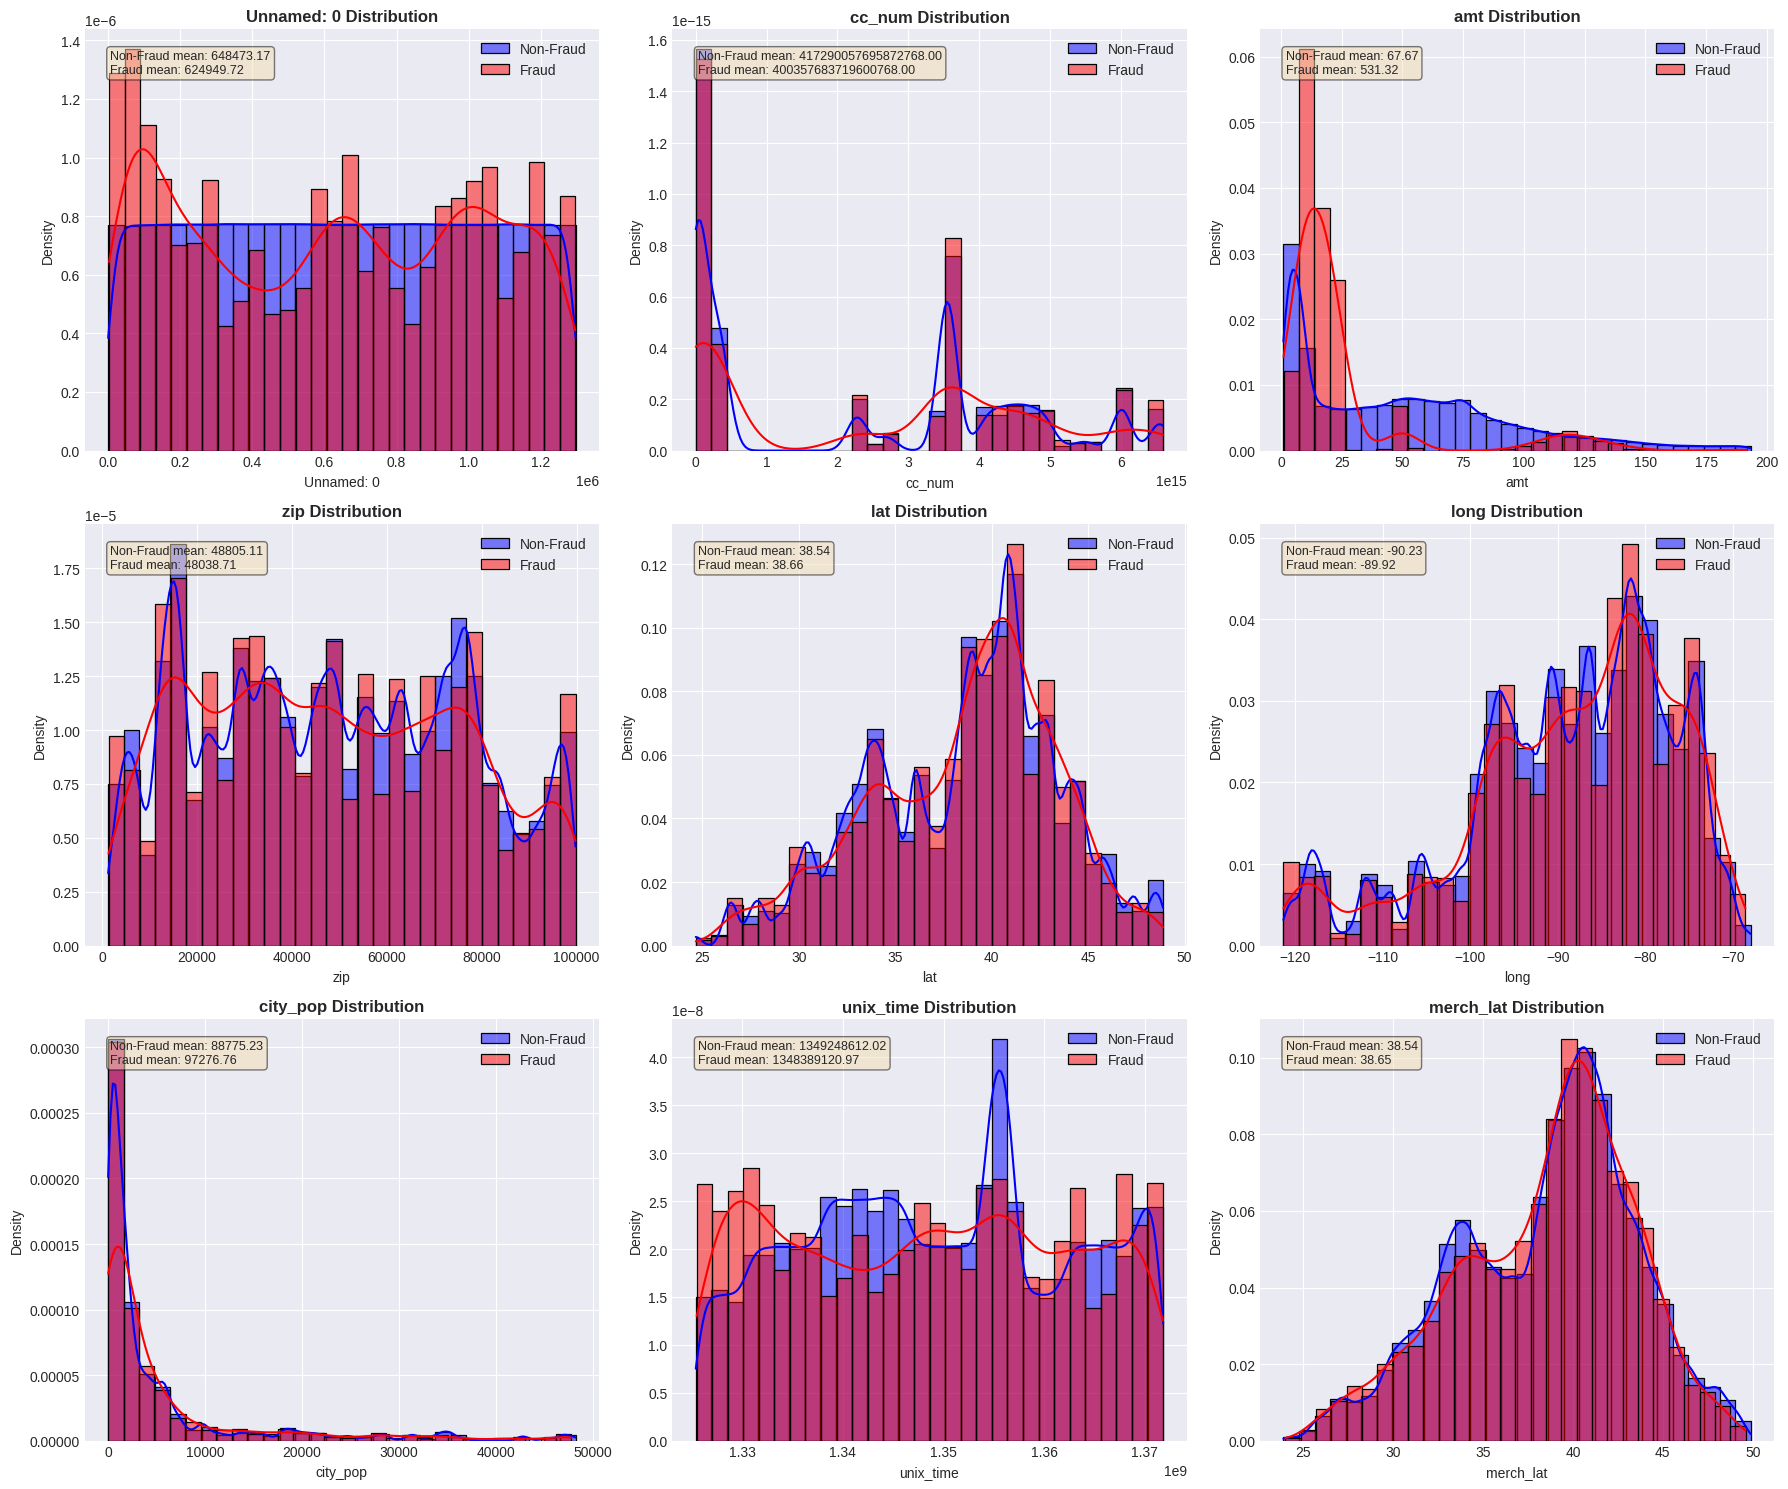



7. PAIRPLOT ANALYSIS
----------------------------------------


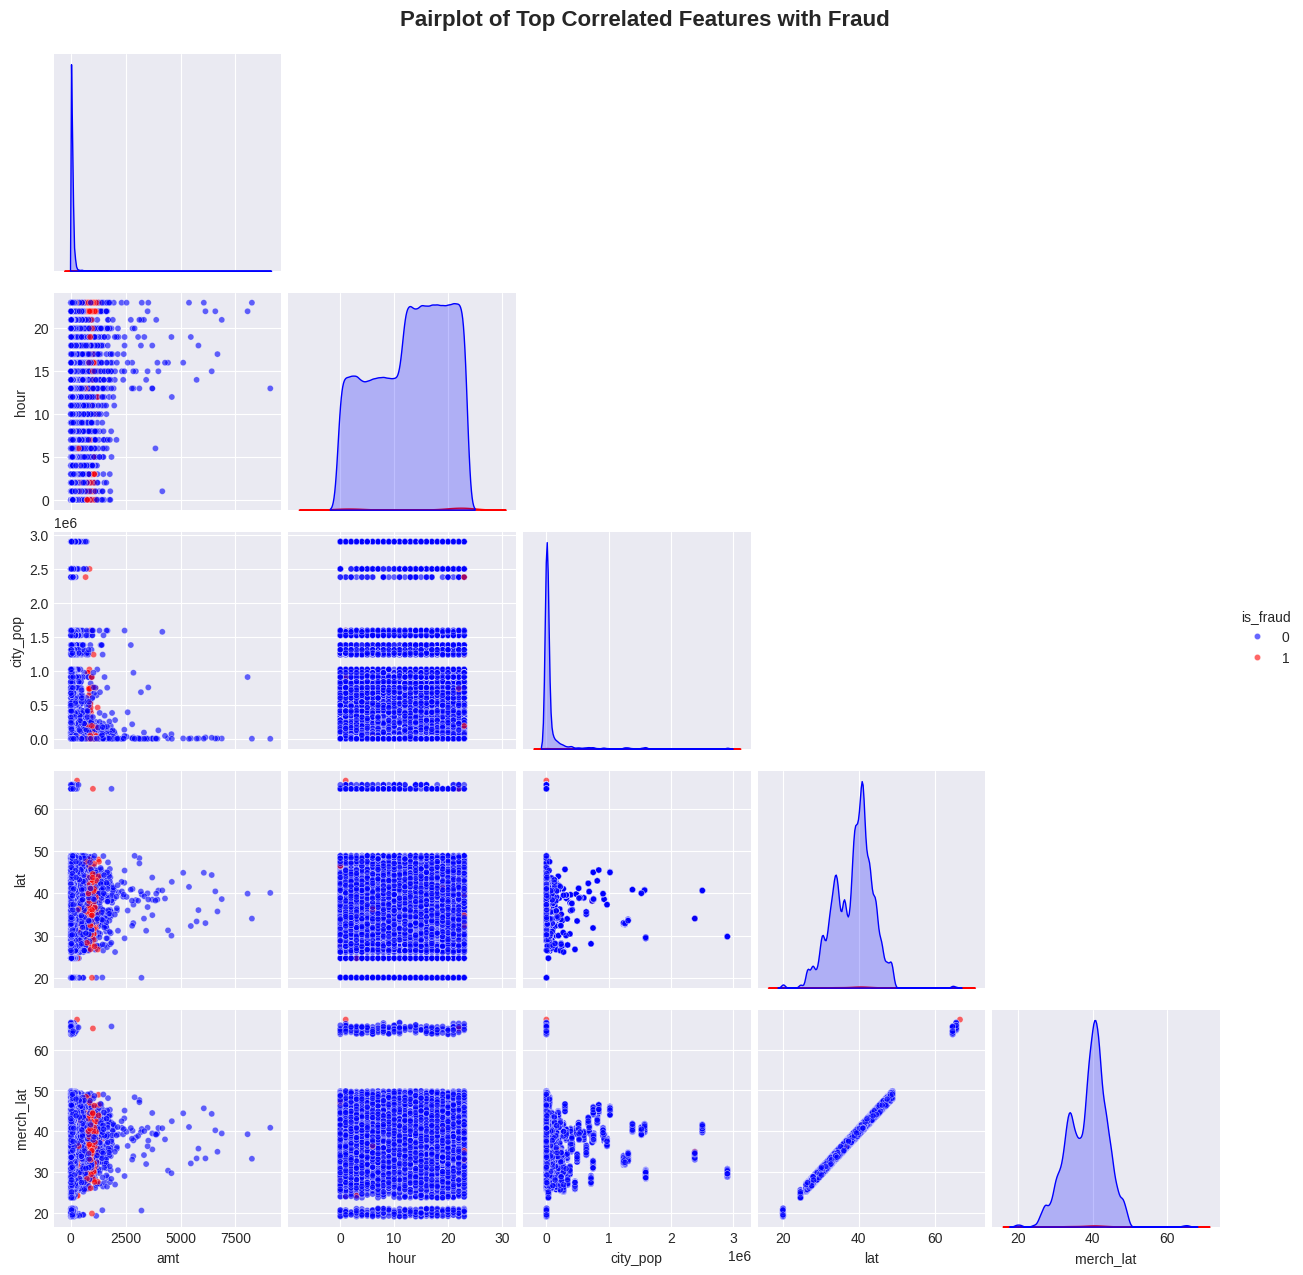



8. MULTIVARIATE ANALYSIS HEATMAPS
----------------------------------------


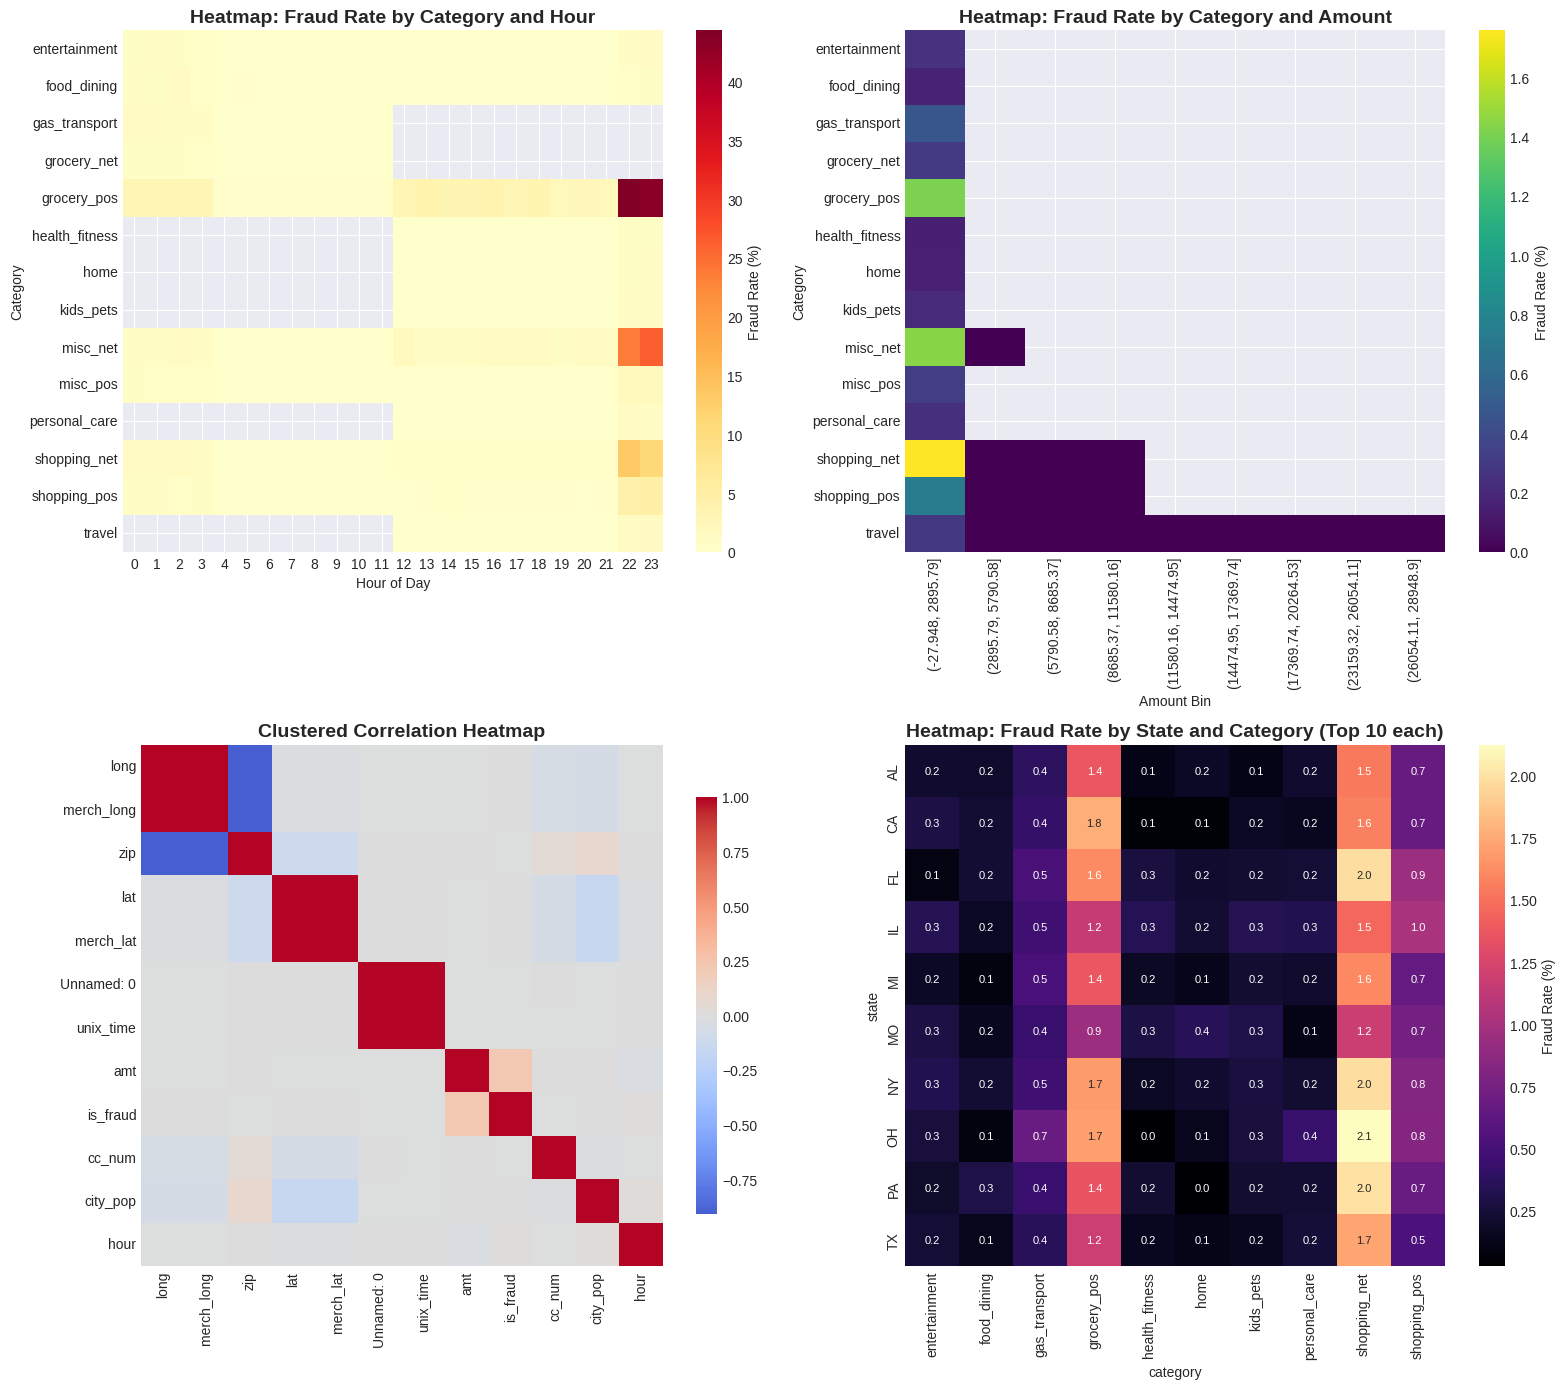



9. TEMPORAL ANALYSIS
----------------------------------------


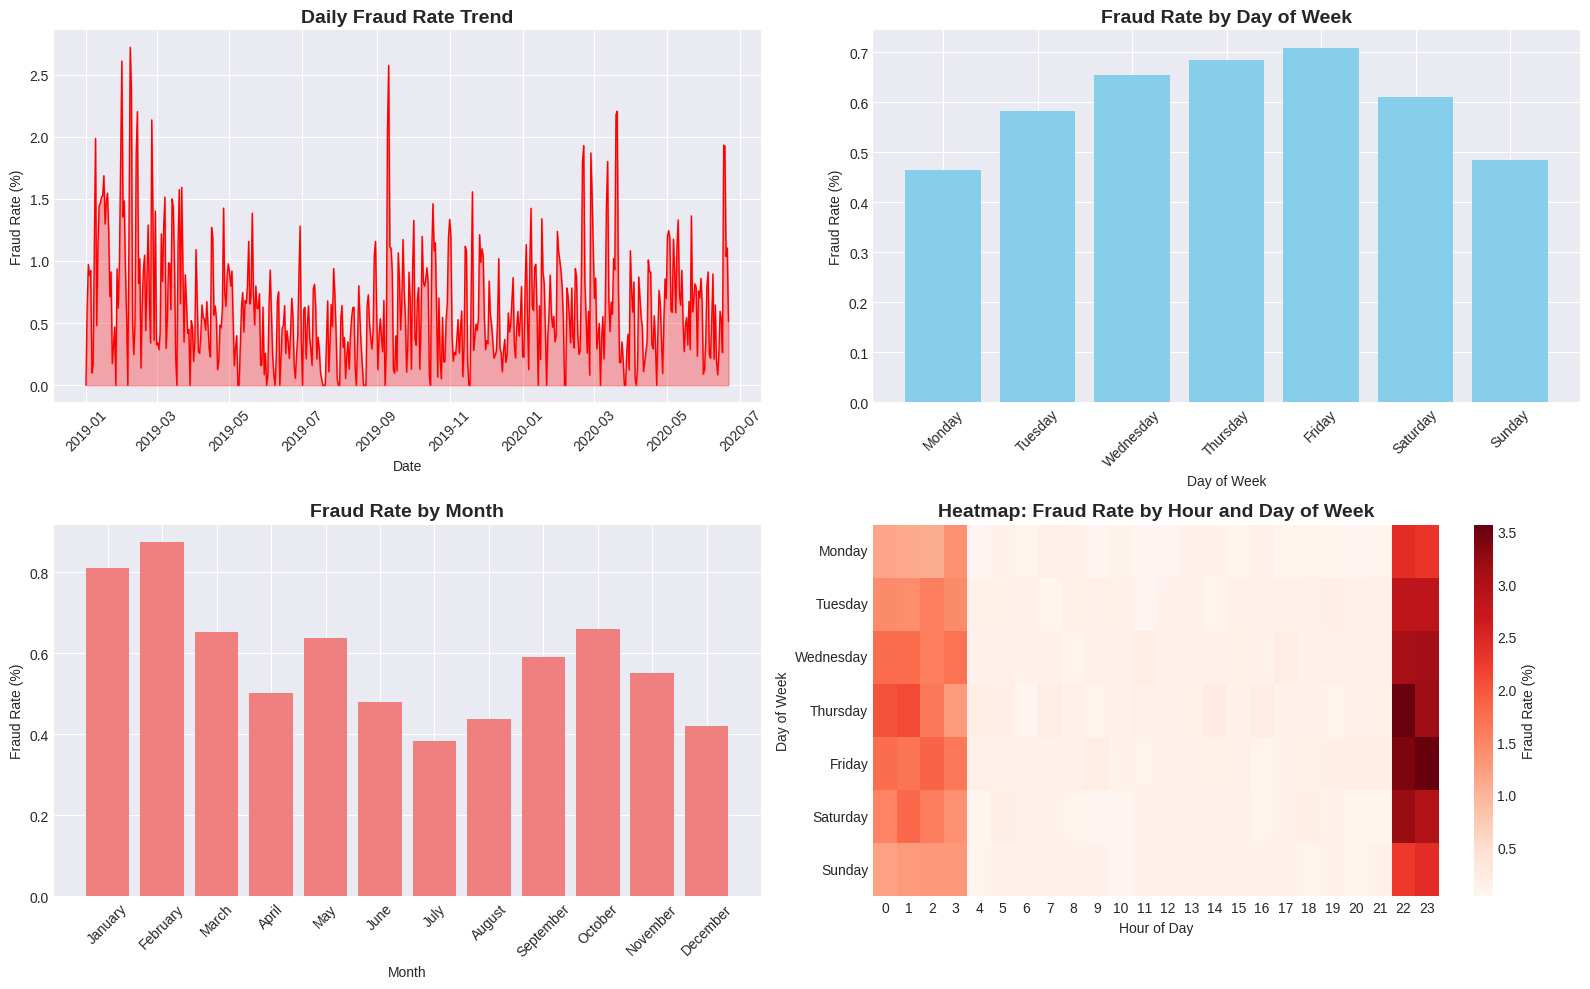



10. OUTLIER ANALYSIS
----------------------------------------


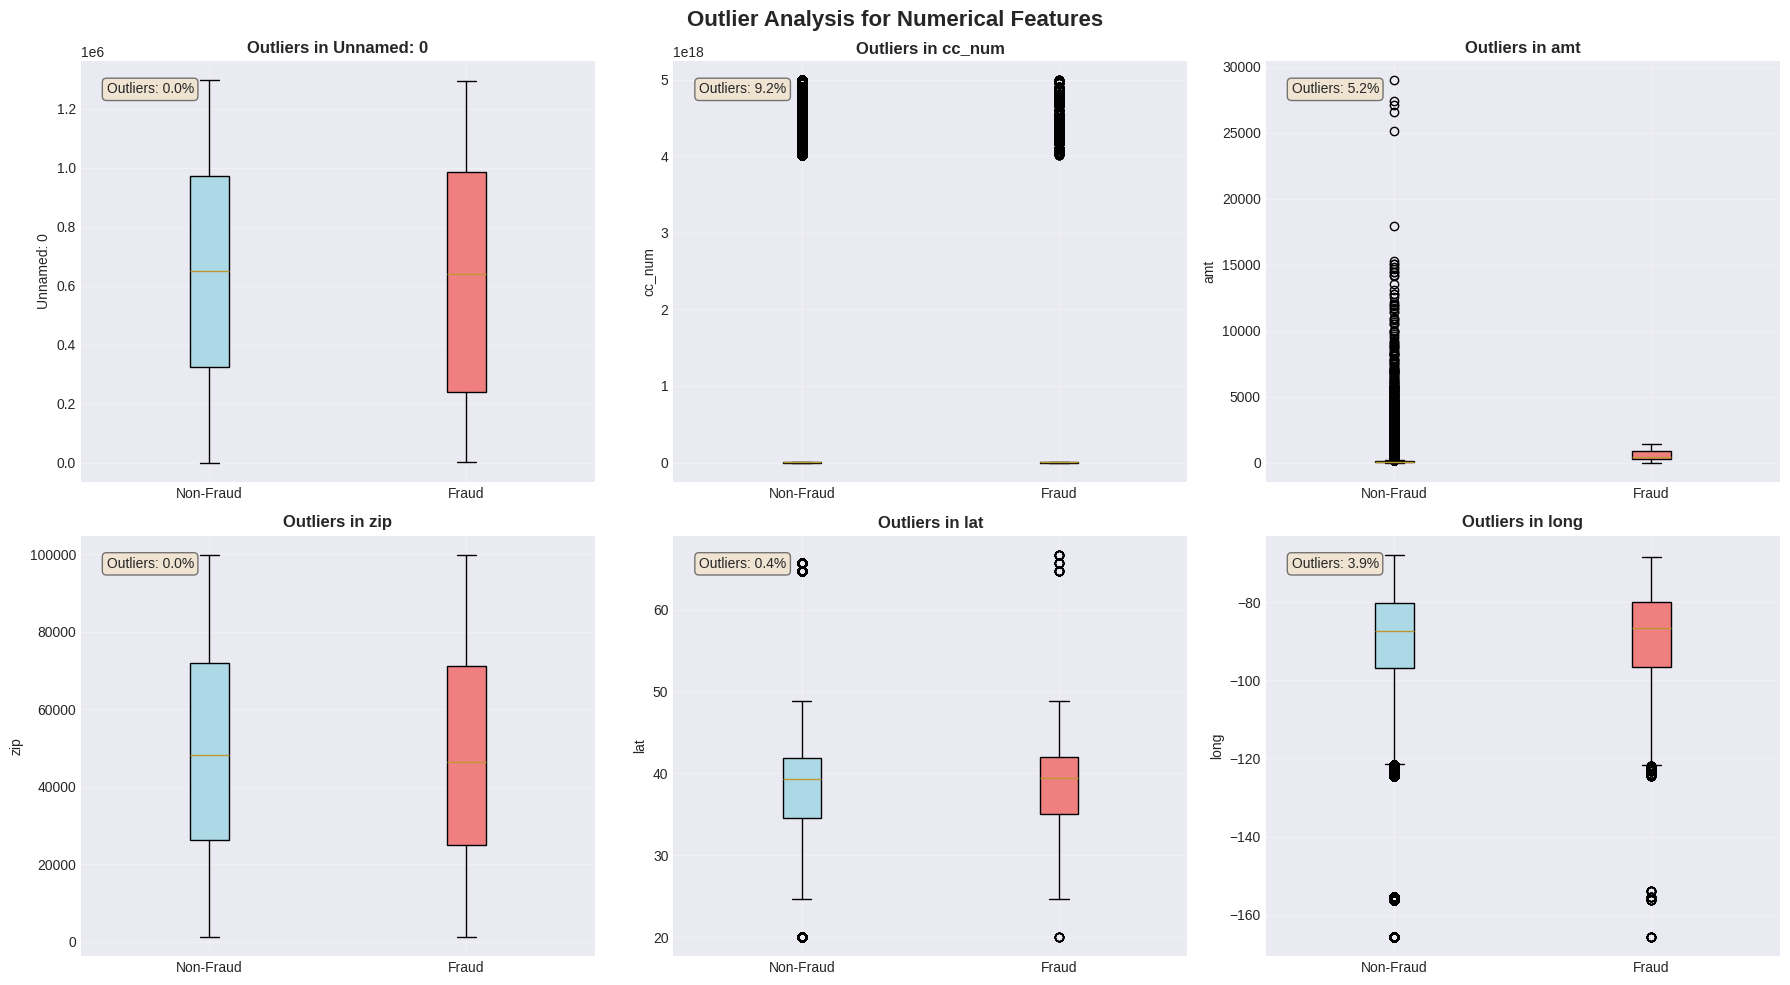



11. STATISTICAL SUMMARY
----------------------------------------

Statistical summary for train dataset:
                           count                           mean  \
Unnamed: 0             1296675.0                       648337.0   
trans_date_trans_time    1296675  2019-10-03 12:47:28.070214144   
cc_num                 1296675.0           417192042079726656.0   
amt                    1296675.0                      70.351035   
zip                    1296675.0                   48800.671097   
lat                    1296675.0                      38.537622   
long                   1296675.0                     -90.226335   
city_pop               1296675.0                   88824.440563   
unix_time              1296675.0              1349243636.726123   
merch_lat              1296675.0                      38.537338   
merch_long             1296675.0                     -90.226465   
is_fraud               1296675.0                       0.005789   
hour                  

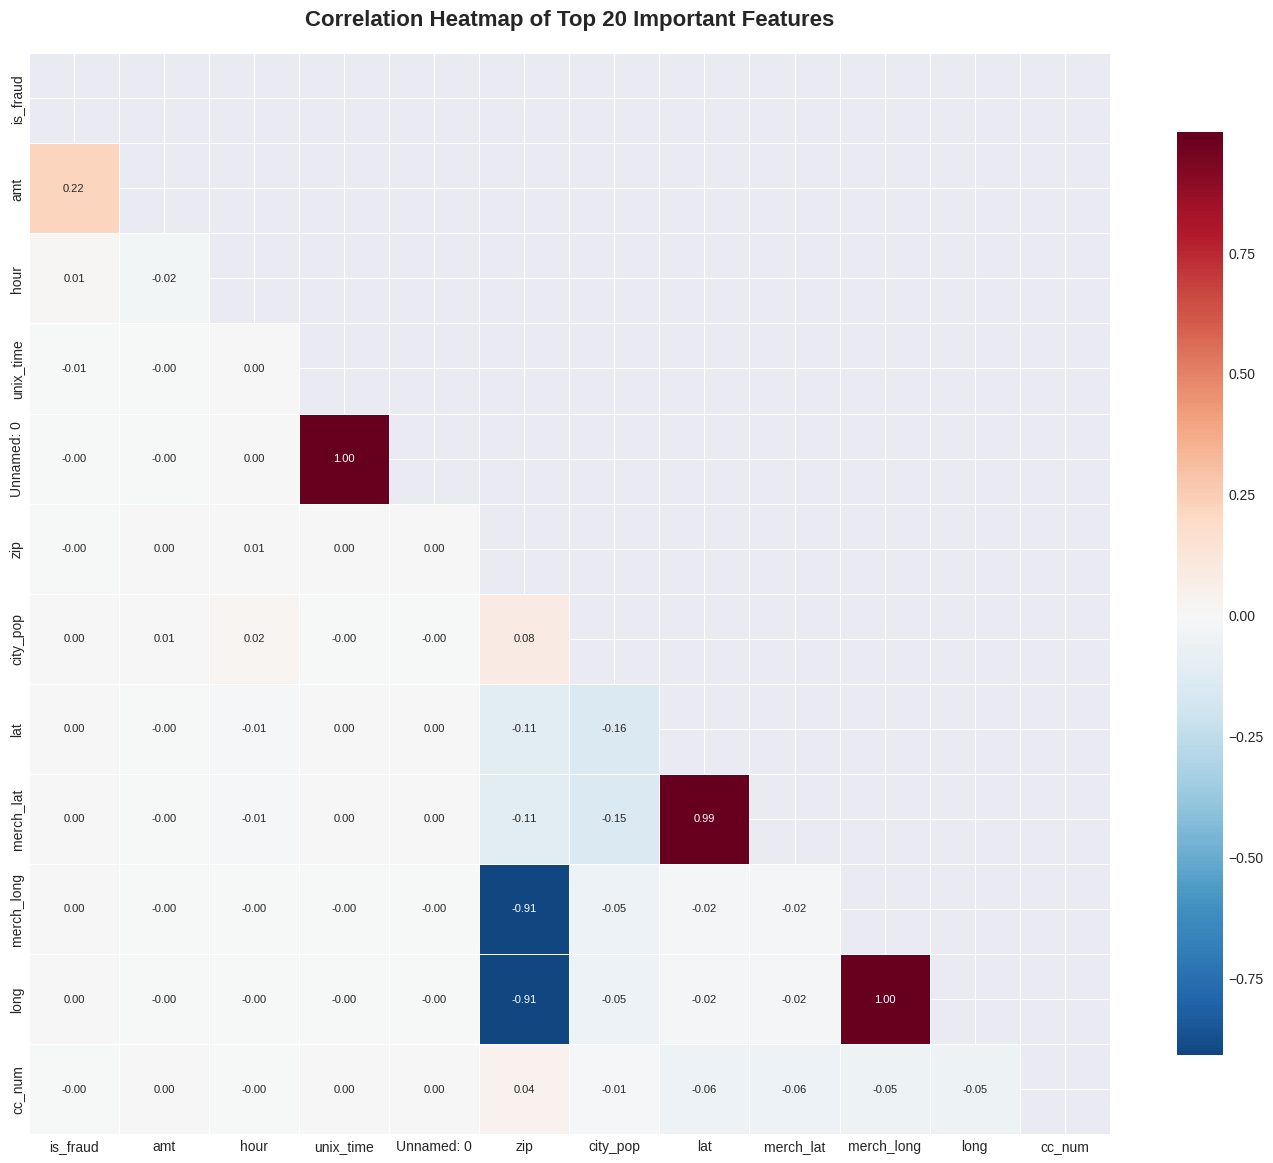


EDA COMPLETED SUCCESSFULLY!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def comprehensive_eda_with_heatmap(train_df, test_df):
    """
    Fungsi untuk melakukan EDA komprehensif dengan berbagai heatmap
    """

    print("=" * 80)
    print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
    print("=" * 80)

    # 1. Basic Information
    print("\n1. BASIC DATASET INFORMATION")
    print("-" * 40)

    print(f"Train dataset shape: {train_df.shape}")
    print(f"Test dataset shape: {test_df.shape}")

    print("\nTrain dataset columns:")
    print(train_df.columns.tolist())

    print("\nTrain dataset info:")
    print(train_df.info())

    # 2. Target Variable Analysis
    print("\n\n3. TARGET VARIABLE ANALYSIS")
    print("-" * 40)

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # Distribution of target variable
    train_fraud_counts = train_df['is_fraud'].value_counts()
    test_fraud_counts = test_df['is_fraud'].value_counts()

    print(f"Train dataset - Fraud distribution:")
    print(f"  Non-Fraud (0): {train_fraud_counts[0]:,} ({train_fraud_counts[0]/len(train_df)*100:.2f}%)")
    print(f"  Fraud (1): {train_fraud_counts[1]:,} ({train_fraud_counts[1]/len(train_df)*100:.2f}%)")
    print(f"  Imbalance Ratio: {train_fraud_counts[0]/train_fraud_counts[1]:.2f}:1")

    print(f"\nTest dataset - Fraud distribution:")
    print(f"  Non-Fraud (0): {test_fraud_counts[0]:,} ({test_fraud_counts[0]/len(test_df)*100:.2f}%)")
    print(f"  Fraud (1): {test_fraud_counts[1]:,} ({test_fraud_counts[1]/len(test_df)*100:.2f}%)")
    print(f"  Imbalance Ratio: {test_fraud_counts[0]/test_fraud_counts[1]:.2f}:1")

    # Pie chart
    axes[0, 0].pie(train_fraud_counts.values, labels=['Non-Fraud', 'Fraud'],
                   autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    axes[0, 0].set_title('Train: Fraud Distribution', fontsize=14, fontweight='bold')

    axes[0, 1].pie(test_fraud_counts.values, labels=['Non-Fraud', 'Fraud'],
                   autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    axes[0, 1].set_title('Test: Fraud Distribution', fontsize=14, fontweight='bold')

    # Bar plot
    axes[0, 2].bar(['Non-Fraud', 'Fraud'], train_fraud_counts.values, color=['blue', 'red'], alpha=0.6)
    axes[0, 2].set_title('Train: Fraud Count', fontsize=14, fontweight='bold')
    axes[0, 2].set_ylabel('Count')
    for i, v in enumerate(train_fraud_counts.values):
        axes[0, 2].text(i, v, f'{v:,}', ha='center', va='bottom')

    # Log scale bar plot
    axes[1, 0].bar(['Non-Fraud', 'Fraud'], train_fraud_counts.values, color=['blue', 'red'], alpha=0.6)
    axes[1, 0].set_title('Train: Fraud Count (Log Scale)', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Count (Log Scale)')
    axes[1, 0].set_yscale('log')

    # Fraud rate by time (if datetime available)
    if 'trans_date_trans_time' in train_df.columns:
        train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
        train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
        fraud_by_hour = train_df.groupby('hour')['is_fraud'].mean() * 100

        axes[1, 1].plot(fraud_by_hour.index, fraud_by_hour.values, marker='o', linewidth=2, color='red')
        axes[1, 1].fill_between(fraud_by_hour.index, fraud_by_hour.values, alpha=0.3, color='red')
        axes[1, 1].set_title('Fraud Rate by Hour of Day', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Hour of Day')
        axes[1, 1].set_ylabel('Fraud Rate (%)')
        axes[1, 1].grid(True, alpha=0.3)

    # Fraud rate by category
    if 'category' in train_df.columns:
        fraud_by_category = train_df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
        axes[1, 2].barh(range(len(fraud_by_category.head(10))),
                       fraud_by_category.head(10).values * 100, color='coral')
        axes[1, 2].set_yticks(range(len(fraud_by_category.head(10))))
        axes[1, 2].set_yticklabels(fraud_by_category.head(10).index)
        axes[1, 2].set_title('Top 10 Categories by Fraud Rate', fontsize=14, fontweight='bold')
        axes[1, 2].set_xlabel('Fraud Rate (%)')

    plt.tight_layout()
    plt.show()

    # 3. CORRELATION HEATMAP - Numeric Features
    print("\n\n4. CORRELATION ANALYSIS WITH HEATMAP")
    print("-" * 40)

    # Pilih kolom numerik
    numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Found {len(numeric_cols)} numeric columns")

    # Correlation matrix untuk semua fitur numerik
    correlation_matrix = train_df[numeric_cols].corr()

    # HEATMAP 1: Full Correlation Matrix
    plt.figure(figsize=(20, 16))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .8},
                annot=False, fmt='.2f')
    plt.title('Full Correlation Heatmap (All Numeric Features)',
              fontsize=18, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    # HEATMAP 2: Correlation with Target Variable
    target_corr = correlation_matrix['is_fraud'].sort_values(ascending=False)

    print("\nTop 10 features positively correlated with fraud:")
    print(target_corr.head(10))

    print("\nTop 10 features negatively correlated with fraud:")
    print(target_corr.tail(10))

    plt.figure(figsize=(10, 8))
    top_features = target_corr[1:21]  # Exclude target itself
    sns.barplot(x=top_features.values, y=top_features.index, palette='RdBu_r')
    plt.title('Top 20 Features Correlation with Fraud', fontsize=16, fontweight='bold')
    plt.xlabel('Correlation Coefficient')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # HEATMAP 3: Focus on High Correlations Only (|corr| > 0.1)
    high_corr_features = target_corr[abs(target_corr) > 0.05].index.tolist()
    if len(high_corr_features) > 1:
        high_corr_matrix = train_df[high_corr_features].corr()

        plt.figure(figsize=(12, 10))
        mask_high = np.triu(np.ones_like(high_corr_matrix, dtype=bool))

        sns.heatmap(high_corr_matrix, mask=mask_high, cmap='coolwarm', center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .8},
                    annot=True, fmt='.2f', annot_kws={'size': 9})
        plt.title(f'Correlation Heatmap (|corr| > 0.05 with target) - {len(high_corr_features)} features',
                  fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # 4. Categorical Variables Analysis
    print("\n\n5. CATEGORICAL VARIABLES ANALYSIS")
    print("-" * 40)

    categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
    print(f"Found {len(categorical_cols)} categorical columns")

    for col in categorical_cols:
        print(f"\n{col}:")
        print(f"  Unique values: {train_df[col].nunique()}")
        if train_df[col].nunique() <= 20:
            print(f"  Value counts:")
            print(train_df[col].value_counts().head())

    # Select top categorical columns for visualization
    categorical_cols_limited = [col for col in categorical_cols if train_df[col].nunique() <= 20]

    if categorical_cols_limited:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()

        for idx, col in enumerate(categorical_cols_limited[:6]):
            fraud_rate_by_cat = train_df.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
            bars = axes[idx].bar(range(len(fraud_rate_by_cat)), fraud_rate_by_cat.values * 100, color='salmon')
            axes[idx].set_title(f'Fraud Rate by {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Fraud Rate (%)')
            axes[idx].tick_params(axis='x', rotation=45)

            # Add value labels
            for bar, value in zip(bars, fraud_rate_by_cat.values * 100):
                axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                             f'{value:.2f}%', ha='center', va='bottom', fontsize=8)

        plt.tight_layout()
        plt.show()

    # 5. Numerical Variables Distribution with Fraud Comparison
    print("\n\n6. NUMERICAL VARIABLES DISTRIBUTION")
    print("-" * 40)

    # Select top numerical features (excluding target)
    numeric_features = [col for col in numeric_cols if col != 'is_fraud']
    top_numeric = numeric_features[:9]  # Limit to 9 for visualization

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.flatten()

    for idx, col in enumerate(top_numeric):
        # Remove outliers for better visualization
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        data_no_outliers = train_df[(train_df[col] >= Q1 - 1.5*IQR) &
                                   (train_df[col] <= Q3 + 1.5*IQR)]

        # Plot distribution by fraud class
        sns.histplot(data=data_no_outliers[data_no_outliers['is_fraud'] == 0],
                    x=col, ax=axes[idx], color='blue', label='Non-Fraud',
                    alpha=0.5, kde=True, stat='density', bins=30)
        sns.histplot(data=data_no_outliers[data_no_outliers['is_fraud'] == 1],
                    x=col, ax=axes[idx], color='red', label='Fraud',
                    alpha=0.5, kde=True, stat='density', bins=30)

        axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].legend()

        # Add statistical annotation
        non_fraud_mean = train_df[train_df['is_fraud'] == 0][col].mean()
        fraud_mean = train_df[train_df['is_fraud'] == 1][col].mean()
        axes[idx].text(0.05, 0.95,
                      f'Non-Fraud mean: {non_fraud_mean:.2f}\nFraud mean: {fraud_mean:.2f}',
                      transform=axes[idx].transAxes, fontsize=9,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

    # 6. PAIRPLOT for Top Correlated Features
    print("\n\n7. PAIRPLOT ANALYSIS")
    print("-" * 40)

    # Select top 5 features most correlated with target
    top_corr_features = target_corr.head(6).index.tolist()  # Include target

    if len(top_corr_features) >= 4:
        pairplot_data = train_df[top_corr_features].sample(frac=0.1, random_state=42)  # Sample for speed

        # Create pairplot with hue as fraud
        g = sns.pairplot(pairplot_data, hue='is_fraud',
                        palette={0: 'blue', 1: 'red'},
                        diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20},
                        corner=True)
        g.fig.suptitle('Pairplot of Top Correlated Features with Fraud',
                      fontsize=16, fontweight='bold', y=1.02)
        plt.show()

    # 7. MULTIVARIATE ANALYSIS: Heatmap of Fraud Rate by Category and Amount
    print("\n\n8. MULTIVARIATE ANALYSIS HEATMAPS")
    print("-" * 40)

    fig, axes = plt.subplots(2, 2, figsize=(16, 14))

    # HEATMAP 1: Fraud rate by category and hour
    if 'category' in train_df.columns and 'trans_date_trans_time' in train_df.columns:
        train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
        pivot_data = train_df.pivot_table(values='is_fraud',
                                         index='category',
                                         columns='hour',
                                         aggfunc='mean') * 100

        sns.heatmap(pivot_data, cmap='YlOrRd', ax=axes[0, 0],
                   cbar_kws={'label': 'Fraud Rate (%)'})
        axes[0, 0].set_title('Heatmap: Fraud Rate by Category and Hour',
                           fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Hour of Day')
        axes[0, 0].set_ylabel('Category')

    # HEATMAP 2: Fraud rate by amount bins and category
    if 'category' in train_df.columns and 'amt' in train_df.columns:
        # Create amount bins
        train_df['amt_bin'] = pd.cut(train_df['amt'], bins=10)
        pivot_data2 = train_df.pivot_table(values='is_fraud',
                                          index='category',
                                          columns='amt_bin',
                                          aggfunc='mean') * 100

        sns.heatmap(pivot_data2, cmap='viridis', ax=axes[0, 1],
                   cbar_kws={'label': 'Fraud Rate (%)'})
        axes[0, 1].set_title('Heatmap: Fraud Rate by Category and Amount',
                           fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Amount Bin')
        axes[0, 1].set_ylabel('Category')

    # HEATMAP 3: Correlation between numerical features (clustered)
    if len(numeric_cols) > 5:
        # Use hierarchical clustering to order correlations
        from scipy.cluster import hierarchy

        # Sample correlation matrix for clustering
        corr_matrix_sampled = correlation_matrix.copy()

        # Perform hierarchical clustering
        linkage = hierarchy.linkage(corr_matrix_sampled, method='average')
        order = hierarchy.dendrogram(linkage, no_plot=True)['ivl']
        ordered_cols = [numeric_cols[int(i)] for i in order]
        ordered_corr = corr_matrix_sampled.loc[ordered_cols, ordered_cols]

        sns.heatmap(ordered_corr, cmap='coolwarm', center=0, ax=axes[1, 0],
                   square=True, cbar_kws={'shrink': 0.8})
        axes[1, 0].set_title('Clustered Correlation Heatmap',
                           fontsize=14, fontweight='bold')
        axes[1, 0].tick_params(axis='x', rotation=90)
        axes[1, 0].tick_params(axis='y', rotation=0)

    # HEATMAP 4: Fraud rate by state and category
    if 'state' in train_df.columns and 'category' in train_df.columns:
        # Get top 10 states and categories
        top_states = train_df['state'].value_counts().head(10).index.tolist()
        top_categories = train_df['category'].value_counts().head(10).index.tolist()

        filtered_data = train_df[train_df['state'].isin(top_states) &
                                train_df['category'].isin(top_categories)]

        if not filtered_data.empty:
            pivot_data3 = filtered_data.pivot_table(values='is_fraud',
                                                   index='state',
                                                   columns='category',
                                                   aggfunc='mean') * 100

            sns.heatmap(pivot_data3, cmap='magma', ax=axes[1, 1],
                       cbar_kws={'label': 'Fraud Rate (%)'},
                       annot=True, fmt='.1f', annot_kws={'size': 8})
            axes[1, 1].set_title('Heatmap: Fraud Rate by State and Category (Top 10 each)',
                               fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # 8. TEMPORAL ANALYSIS
    print("\n\n9. TEMPORAL ANALYSIS")
    print("-" * 40)

    if 'trans_date_trans_time' in train_df.columns:
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))

        # Extract temporal features
        train_df['date'] = train_df['trans_date_trans_time'].dt.date
        train_df['day_of_week'] = train_df['trans_date_trans_time'].dt.day_name()
        train_df['month'] = train_df['trans_date_trans_time'].dt.month_name()

        # Daily fraud rate
        daily_fraud = train_df.groupby('date')['is_fraud'].mean() * 100
        axes[0, 0].plot(daily_fraud.index, daily_fraud.values, linewidth=1, color='red')
        axes[0, 0].fill_between(daily_fraud.index, daily_fraud.values, alpha=0.3, color='red')
        axes[0, 0].set_title('Daily Fraud Rate Trend', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Date')
        axes[0, 0].set_ylabel('Fraud Rate (%)')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # Fraud rate by day of week
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        fraud_by_day = train_df.groupby('day_of_week')['is_fraud'].mean().reindex(day_order) * 100
        axes[0, 1].bar(fraud_by_day.index, fraud_by_day.values, color='skyblue')
        axes[0, 1].set_title('Fraud Rate by Day of Week', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Day of Week')
        axes[0, 1].set_ylabel('Fraud Rate (%)')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # Fraud rate by month
        month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                      'July', 'August', 'September', 'October', 'November', 'December']
        fraud_by_month = train_df.groupby('month')['is_fraud'].mean().reindex(month_order) * 100
        axes[1, 0].bar(fraud_by_month.index, fraud_by_month.values, color='lightcoral')
        axes[1, 0].set_title('Fraud Rate by Month', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Month')
        axes[1, 0].set_ylabel('Fraud Rate (%)')
        axes[1, 0].tick_params(axis='x', rotation=45)

        # Heatmap: Hour vs Day of Week
        pivot_temp = train_df.pivot_table(values='is_fraud',
                                         index='day_of_week',
                                         columns='hour',
                                         aggfunc='mean') * 100

        # Reindex untuk urutan yang benar
        pivot_temp = pivot_temp.reindex(day_order)

        sns.heatmap(pivot_temp, cmap='Reds', ax=axes[1, 1],
                   cbar_kws={'label': 'Fraud Rate (%)'})
        axes[1, 1].set_title('Heatmap: Fraud Rate by Hour and Day of Week',
                           fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Hour of Day')
        axes[1, 1].set_ylabel('Day of Week')

        plt.tight_layout()
        plt.show()

    # 9. OUTLIER DETECTION dengan Boxplot Heatmap
    print("\n\n10. OUTLIER ANALYSIS")
    print("-" * 40)

    # Select top 6 numerical features for outlier analysis
    top_numeric_outliers = numeric_features[:6]

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(top_numeric_outliers):
        # Create boxplot for fraud vs non-fraud
        data_to_plot = [train_df[train_df['is_fraud'] == 0][col].values,
                       train_df[train_df['is_fraud'] == 1][col].values]

        bp = axes[idx].boxplot(data_to_plot, patch_artist=True,
                              labels=['Non-Fraud', 'Fraud'])

        # Color the boxes
        colors = ['lightblue', 'lightcoral']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        axes[idx].set_title(f'Outliers in {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)

        # Calculate and display outlier percentage
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = train_df[(train_df[col] < Q1 - 1.5*IQR) | (train_df[col] > Q3 + 1.5*IQR)]
        outlier_pct = (len(outliers) / len(train_df)) * 100

        axes[idx].text(0.05, 0.95, f'Outliers: {outlier_pct:.1f}%',
                      transform=axes[idx].transAxes, fontsize=10,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.suptitle('Outlier Analysis for Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 10. STATISTICAL SUMMARY
    print("\n\n11. STATISTICAL SUMMARY")
    print("-" * 40)

    print("\nStatistical summary for train dataset:")
    print(train_df.describe().T)

    print("\nStatistical summary for fraud transactions:")
    fraud_stats = train_df[train_df['is_fraud'] == 1].describe().T
    print(fraud_stats)

    print("\nStatistical summary for non-fraud transactions:")
    non_fraud_stats = train_df[train_df['is_fraud'] == 0].describe().T
    print(non_fraud_stats.head(10))

    # 11. DATA QUALITY REPORT
    print("\n\n12. DATA QUALITY REPORT")
    print("-" * 40)

    quality_report = pd.DataFrame({
        'Column': train_df.columns,
        'Data Type': train_df.dtypes.values,
        'Unique Values': [train_df[col].nunique() for col in train_df.columns],
        'Missing Values': train_df.isnull().sum().values,
        'Missing %': (train_df.isnull().sum().values / len(train_df)) * 100,
        'Zero Values': [(train_df[col] == 0).sum() if train_df[col].dtype in [np.int64, np.float64] else 0
                       for col in train_df.columns],
        'Sample Values': [train_df[col].iloc[0] if train_df[col].dtype == 'object' else np.nan
                         for col in train_df.columns]
    })

    print("\nData Quality Summary:")
    print(f"Total rows: {len(train_df):,}")
    print(f"Total columns: {len(train_df.columns)}")
    print(f"Total missing values: {train_df.isnull().sum().sum():,}")
    print(f"Percentage of missing values: {(train_df.isnull().sum().sum() / (len(train_df) * len(train_df.columns))) * 100:.2f}%")

    print("\nTop 10 columns with most unique values:")
    print(quality_report.sort_values('Unique Values', ascending=False).head(10)[['Column', 'Unique Values']])

    print("\nColumns with missing values:")
    missing_cols = quality_report[quality_report['Missing Values'] > 0]
    if len(missing_cols) > 0:
        print(missing_cols[['Column', 'Missing Values', 'Missing %']])
    else:
        print("No missing values found!")

    # 12. FINAL HEATMAP: Feature Importance Correlation (Simulated)
    print("\n\n13. FEATURE IMPORTANCE CORRELATION MATRIX")
    print("-" * 40)

    # Create a simulated feature importance based on correlation with target
    feature_importance = pd.DataFrame({
        'Feature': numeric_cols,
        'Correlation_with_Target': [correlation_matrix.loc[col, 'is_fraud'] for col in numeric_cols],
        'Std_Dev': train_df[numeric_cols].std().values,
        'Mean': train_df[numeric_cols].mean().values,
        'Fraud_Mean': train_df[train_df['is_fraud'] == 1][numeric_cols].mean().values,
        'NonFraud_Mean': train_df[train_df['is_fraud'] == 0][numeric_cols].mean().values
    })

    feature_importance['Mean_Diff'] = feature_importance['Fraud_Mean'] - feature_importance['NonFraud_Mean']
    feature_importance['Mean_Diff_Pct'] = (feature_importance['Mean_Diff'] / feature_importance['Mean']) * 100

    # Sort by absolute correlation
    feature_importance['Abs_Correlation'] = abs(feature_importance['Correlation_with_Target'])
    feature_importance = feature_importance.sort_values('Abs_Correlation', ascending=False)

    print("\nTop 20 Most Important Features (based on correlation with target):")
    print(feature_importance[['Feature', 'Correlation_with_Target', 'Mean_Diff_Pct']].head(20))

    # Create heatmap for top 20 features
    top_features = feature_importance.head(20)['Feature'].tolist()

    if len(top_features) > 1:
        # Calculate correlation matrix for top features
        top_corr_matrix = train_df[top_features].corr()

        plt.figure(figsize=(14, 12))
        mask_top = np.triu(np.ones_like(top_corr_matrix, dtype=bool))

        sns.heatmap(top_corr_matrix, mask=mask_top, cmap='RdBu_r', center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .8},
                    annot=True, fmt='.2f', annot_kws={'size': 8})

        plt.title('Correlation Heatmap of Top 20 Important Features',
                  fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()


    return quality_report, feature_importance, correlation_matrix

# Execute EDA
print("Starting Comprehensive EDA...")
quality_report, feature_importance, corr_matrix = comprehensive_eda_with_heatmap(train_df, test_df)

print("\n" + "="*80)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*80)

## PREPROCESSING


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================
# PREPROCESSING CLASS (YANG TIDAK BISA DI RUN)
# ============================================

class CreditCardFraudPreprocessorFixed:
    """Preprocessor dengan perbaikan untuk menghindari error"""

    def __init__(self, outlier_method='iqr', outlier_strategy='clip',
                 categorical_encoder='onehot', scale_method='robust'):
        self.outlier_method = outlier_method
        self.outlier_strategy = outlier_strategy
        self.categorical_encoder = categorical_encoder
        self.scale_method = scale_method

        self.encoders = {}
        self.scalers = {}
        self.feature_names = None
        self.outlier_bounds = {}

    def _extract_features(self, df):
        """Ekstrak fitur dari data mentah"""
        df = df.copy()

        # 1. Extract datetime features
        if 'trans_date_trans_time' in df.columns:
            df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
            df['trans_hour'] = df['trans_date_trans_time'].dt.hour
            df['trans_day'] = df['trans_date_trans_time'].dt.day
            df['trans_month'] = df['trans_date_trans_time'].dt.month
            df['trans_year'] = df['trans_date_trans_time'].dt.year
            df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
            df['trans_is_weekend'] = df['trans_dayofweek'].isin([5, 6]).astype(int)

            # Time-based features
            if 'unix_time' in df.columns:
                df['unix_time'] = pd.to_numeric(df['unix_time'], errors='coerce')
                df['time_of_day'] = np.sin(2 * np.pi * df['trans_hour'] / 24)
                df['day_of_year'] = df['trans_date_trans_time'].dt.dayofyear

        # 2. Extract age from dob
        if 'dob' in df.columns:
            df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
            df['age'] = (pd.to_datetime('2020-12-31') - df['dob']).dt.days // 365
            # Remove invalid ages
            df['age'] = df['age'].apply(lambda x: x if 18 <= x <= 100 else np.nan)
            df['age'] = df['age'].fillna(df['age'].median())

            # Age bins (numerical encoding)
            df['age_bin'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 100],
                                  labels=[1, 2, 3, 4, 5, 6]).astype(float)

        # 3. Transaction features (berdasarkan insight EDA)
        df['amt_log'] = np.log1p(df['amt'])
        df['amt_zscore'] = (df['amt'] - df['amt'].mean()) / df['amt'].std()

        # Amount risk flags (berdasarkan EDA fraud transactions punya amount lebih tinggi)
        df['high_risk_amt'] = (df['amt'] > df['amt'].quantile(0.95)).astype(int)
        df['very_high_amt'] = (df['amt'] > 1000).astype(int)

        # 4. Population features
        if 'city_pop' in df.columns:
            df['city_pop_log'] = np.log1p(df['city_pop'])
            df['amt_per_pop'] = df['amt'] / (df['city_pop'] + 1)  # +1 untuk avoid division by zero
            df['pop_density_flag'] = (df['city_pop'] > df['city_pop'].median()).astype(int)

        # 5. Location features
        if all(col in df.columns for col in ['lat', 'long', 'merch_lat', 'merch_long']):
            # Haversine distance
            def haversine(lat1, lon1, lat2, lon2):
                R = 6371  # Earth radius in km
                lat1_rad = np.radians(lat1)
                lon1_rad = np.radians(lon1)
                lat2_rad = np.radians(lat2)
                lon2_rad = np.radians(lon2)

                dlat = lat2_rad - lat1_rad
                dlon = lon2_rad - lon1_rad

                a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
                c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

                return R * c

            df['distance_km'] = df.apply(
                lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
                axis=1
            )
            df['distance_log'] = np.log1p(df['distance_km'])
            df['long_distance_flag'] = (df['distance_km'] > 100).astype(int)

        # 6. Time-based risk flags (berdasarkan EDA fraud lebih sering di jam tertentu)
        df['late_night'] = ((df['trans_hour'] >= 0) & (df['trans_hour'] <= 5)).astype(int)
        df['rush_hour'] = ((df['trans_hour'] >= 7) & (df['trans_hour'] <= 9)) | \
                          ((df['trans_hour'] >= 16) & (df['trans_hour'] <= 18))
        df['rush_hour'] = df['rush_hour'].astype(int)

        # 7. Merchant category risk (berdasarkan EDA)
        if 'category' in df.columns:
            # High risk categories based on EDA
            high_risk_categories = ['misc_net', 'grocery_pos', 'shopping_net']
            df['high_risk_category'] = df['category'].isin(high_risk_categories).astype(int)

        return df

    def _detect_outliers(self, df, column, method='iqr'):
        """Deteksi outliers untuk satu kolom"""
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        elif method == 'zscore':
            mean = df[column].mean()
            std = df[column].std()
            lower_bound = mean - 3 * std
            upper_bound = mean + 3 * std
        else:
            return None

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_pct = (len(outliers) / len(df)) * 100

        return {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_count': len(outliers),
            'outlier_percent': outlier_pct
        }

    def _handle_outliers_column(self, df, column, bounds, strategy='clip'):
        """Handle outliers untuk satu kolom"""
        if strategy == 'clip':
            df[column] = np.clip(df[column], bounds['lower_bound'], bounds['upper_bound'])
        elif strategy == 'remove':
            df = df[(df[column] >= bounds['lower_bound']) & (df[column] <= bounds['upper_bound'])]
        elif strategy == 'winsorize':
            # Replace with percentiles
            lower_percentile = df[column].quantile(0.01)
            upper_percentile = df[column].quantile(0.99)
            df[column] = np.clip(df[column], lower_percentile, upper_percentile)

        return df

    def _encode_categorical(self, df, is_train=True):
        """Encode categorical features"""
        # Identifikasi kolom kategorikal
        categorical_cols = []
        for col in df.columns:
            if df[col].dtype == 'object' or df[col].dtype.name == 'category':
                categorical_cols.append(col)

        if not categorical_cols:
            return df

        encoded_df = df.copy()

        for col in categorical_cols:
            if self.categorical_encoder == 'label':
                if is_train:
                    # Buat mapping untuk label encoding
                    unique_values = encoded_df[col].unique()
                    label_map = {val: idx for idx, val in enumerate(unique_values)}
                    self.encoders[col] = label_map

                if col in self.encoders:
                    encoded_df[col + '_encoded'] = encoded_df[col].map(self.encoders[col])
                    encoded_df[col + '_encoded'] = encoded_df[col + '_encoded'].fillna(-1)
                    encoded_df = encoded_df.drop(columns=[col])

            elif self.categorical_encoder == 'frequency':
                if is_train:
                    # Frequency encoding
                    freq_map = encoded_df[col].value_counts(normalize=True).to_dict()
                    self.encoders[col] = freq_map

                if col in self.encoders:
                    encoded_df[col + '_freq'] = encoded_df[col].map(self.encoders[col])
                    encoded_df[col + '_freq'] = encoded_df[col + '_freq'].fillna(0)
                    encoded_df = encoded_df.drop(columns=[col])

            elif self.categorical_encoder == 'onehot':
                # Untuk one-hot, kita akan handle secara manual untuk kolom dengan sedikit unique values
                if encoded_df[col].nunique() <= 10:  # Hanya untuk kategori dengan <= 10 unique values
                    if is_train:
                        unique_values = encoded_df[col].unique()
                        self.encoders[col] = unique_values

                    # Create binary columns
                    if col in self.encoders:
                        for val in self.encoders[col]:
                            encoded_df[f'{col}_{val}'] = (encoded_df[col] == val).astype(int)
                        encoded_df = encoded_df.drop(columns=[col])

        return encoded_df

    def _scale_features(self, df, is_train=True):
        """Scale numerical features"""
        # Identifikasi kolom numerik
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

        # Exclude target jika ada
        if 'is_fraud' in numeric_cols:
            numeric_cols.remove('is_fraud')

        scaled_df = df.copy()

        for col in numeric_cols:
            if is_train:
                if self.scale_method == 'standard':
                    from sklearn.preprocessing import StandardScaler
                    scaler = StandardScaler()
                elif self.scale_method == 'robust':
                    from sklearn.preprocessing import RobustScaler
                    scaler = RobustScaler()
                else:
                    from sklearn.preprocessing import MinMaxScaler
                    scaler = MinMaxScaler()

                scaler.fit(scaled_df[[col]])
                self.scalers[col] = scaler

            if col in self.scalers:
                scaled_df[[col]] = self.scalers[col].transform(scaled_df[[col]])

        return scaled_df

    def fit_transform(self, df, target_col='is_fraud'):
        """Proses training data"""
        print("=" * 60)
        print("PREPROCESSING TRAINING DATA")
        print("=" * 60)

        # 1. Extract features
        print("1. Extracting features...")
        df_processed = self._extract_features(df)

        # 2. Drop unnecessary columns
        print("2. Dropping unnecessary columns...")
        columns_to_drop = [
            'trans_date_trans_time', 'first', 'last', 'street', 'city',
            'trans_num', 'unix_time', 'dob', 'index', 'cc_num',
            'merchant', 'state', 'zip', 'job', 'lat', 'long',
            'merch_lat', 'merch_long'
        ]

        columns_to_drop = [col for col in columns_to_drop if col in df_processed.columns]
        df_processed = df_processed.drop(columns=columns_to_drop)

        # 3. Separate target
        if target_col in df_processed.columns:
            y = df_processed[target_col]
            X = df_processed.drop(columns=[target_col])
        else:
            X = df_processed
            y = None

        # 4. Handle outliers (fokus pada kolom dengan outlier > 5%)
        print("3. Handling outliers...")
        numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        outlier_report = []

        for col in numeric_cols:
            outlier_stats = self._detect_outliers(X, col, method=self.outlier_method)
            if outlier_stats and outlier_stats['outlier_percent'] > 5:
                outlier_report.append({
                    'column': col,
                    'outlier_percent': outlier_stats['outlier_percent'],
                    'lower_bound': outlier_stats['lower_bound'],
                    'upper_bound': outlier_stats['upper_bound']
                })

                # Store bounds untuk digunakan di transform
                self.outlier_bounds[col] = {
                    'lower_bound': outlier_stats['lower_bound'],
                    'upper_bound': outlier_stats['upper_bound']
                }

                # Handle outliers
                X = self._handle_outliers_column(X, col, outlier_stats, strategy=self.outlier_strategy)

        print(f"   Found {len(outlier_report)} features with >5% outliers")
        for item in outlier_report[:5]:  # Print top 5
            print(f"     - {item['column']}: {item['outlier_percent']:.1f}% outliers")

        # 5. Encode categorical features
        print("4. Encoding categorical features...")
        X = self._encode_categorical(X, is_train=True)

        # 6. Scale features
        print("5. Scaling numerical features...")
        X = self._scale_features(X, is_train=True)

        # 7. Ensure all columns are numeric
        X = X.select_dtypes(include=[np.number])

        # 8. Save feature names
        self.feature_names = X.columns.tolist()

        print(f"\n✅ Preprocessing completed!")
        print(f"   Original shape: {df.shape}")
        print(f"   Processed shape: {X.shape}")

        # Generate simplified report
        self._generate_simple_report(X)

        return X, y

    def transform(self, df, target_col='is_fraud'):
        """Transform test/inference data"""
        # 1. Extract features
        df_processed = self._extract_features(df)

        # 2. Drop columns (same as training)
        columns_to_drop = [
            'trans_date_trans_time', 'first', 'last', 'street', 'city',
            'trans_num', 'unix_time', 'dob', 'index', 'cc_num',
            'merchant', 'state', 'zip', 'job', 'lat', 'long',
            'merch_lat', 'merch_long'
        ]
        columns_to_drop = [col for col in columns_to_drop if col in df_processed.columns]
        df_processed = df_processed.drop(columns=columns_to_drop)

        # 3. Separate target
        if target_col in df_processed.columns:
            y = df_processed[target_col]
            X = df_processed.drop(columns=[target_col])
        else:
            X = df_processed
            y = None

        # 4. Handle outliers (using bounds from training)
        for col in self.outlier_bounds:
            if col in X.columns:
                X = self._handle_outliers_column(X, col, self.outlier_bounds[col],
                                                strategy=self.outlier_strategy)

        # 5. Encode categorical features
        X = self._encode_categorical(X, is_train=False)

        # 6. Scale features
        X = self._scale_features(X, is_train=False)

        # 7. Ensure all columns are numeric and match training
        X = X.select_dtypes(include=[np.number])

        # Add missing columns with 0
        missing_cols = set(self.feature_names) - set(X.columns)
        for col in missing_cols:
            X[col] = 0

        # Reorder columns
        X = X[self.feature_names]

        return X, y

    def _generate_simple_report(self, X):
        """Generate simplified preprocessing report"""
        print("\n" + "=" * 60)
        print("PREPROCESSING REPORT")
        print("=" * 60)

        print(f"Number of features: {X.shape[1]}")
        print(f"Data types:")
        for dtype, count in X.dtypes.value_counts().items():
            print(f"  {dtype}: {count}")

        # Check for any non-numeric columns
        non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
        if non_numeric:
            print(f"WARNING: {len(non_numeric)} non-numeric columns found")
        else:
            print("✅ All columns are numeric")

        # Check for missing values
        missing = X.isnull().sum().sum()
        if missing > 0:
            print(f"WARNING: {missing} missing values found")
        else:
            print("✅ No missing values")

# ============================================
# RUN PREPROCESSING
# ============================================

# Inisialisasi preprocessor
preprocessor = CreditCardFraudPreprocessorFixed(
    outlier_method='iqr',
    outlier_strategy='clip',
    categorical_encoder='onehot',
    scale_method='robust'
)

# Preprocess training data
print("\n" + "="*60)
print("PREPROCESSING TRAINING DATA")
print("="*60)
X_train, y_train = preprocessor.fit_transform(train_df, target_col='is_fraud')

# Preprocess test data
print("\n" + "="*60)
print("PREPROCESSING TEST DATA")
print("="*60)
X_test, y_test = preprocessor.transform(test_df, target_col='is_fraud')

# ============================================
# CHECK RESULT
# ============================================

print("\n" + "="*60)
print("FINAL CHECK")
print("="*60)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nFirst 5 features:", X_train.columns[:5].tolist())
print(f"Training fraud rate: {y_train.mean():.4%}")
print(f"Test fraud rate: {y_test.mean():.4%}")

# Save processed data untuk model training
print("\nSaving processed data...")
X_train.to_csv('X_train_processed.csv', index=False)
y_train.to_csv('y_train_processed.csv', index=False)
X_test.to_csv('X_test_processed.csv', index=False)
y_test.to_csv('y_test_processed.csv', index=False)
print("✅ Processed data saved to CSV files!")


PREPROCESSING TRAINING DATA
PREPROCESSING TRAINING DATA
1. Extracting features...
2. Dropping unnecessary columns...
3. Handling outliers...
   Found 8 features with >5% outliers
     - amt: 5.2% outliers
     - city_pop: 18.7% outliers
     - amt_zscore: 5.2% outliers
     - amt_per_pop: 13.0% outliers
     - long_distance_flag: 23.4% outliers
4. Encoding categorical features...
5. Scaling numerical features...

✅ Preprocessing completed!
   Original shape: (1296675, 28)
   Processed shape: (1296675, 45)

PREPROCESSING REPORT
Number of features: 45
Data types:
  float64: 45
✅ All columns are numeric
✅ No missing values

PREPROCESSING TEST DATA

FINAL CHECK
X_train shape: (1296675, 45)
y_train shape: (1296675,)
X_test shape: (555719, 45)
y_test shape: (555719,)

First 5 features: ['Unnamed: 0', 'amt', 'city_pop', 'hour', 'trans_hour']
Training fraud rate: 0.5789%
Test fraud rate: 0.3860%

Saving processed data...
✅ Processed data saved to CSV files!


Starting Fraud Detection Pipeline with 3 Key Features...
Loading preprocessed data...
✅ Data loaded successfully
   X_train: (1296675, 45)
   y_train: (1296675,) (fraud rate: 0.5789%)
   X_test: (555719, 45)
   y_test: (555719,) (fraud rate: 0.3860%)
FRAUD DETECTION PIPELINE WITH 3 KEY FEATURES
🎯 TARGET: F1 Score > 0.8

✅ FEATURES:
   1. Integrated Pipeline (RF + Boosting + Stacking)
   2. Systematic Hyperparameter Optimization
   3. Robustness Testing for Data Distribution Changes

📊 Using SMART SAMPLING strategy...
   - Downsample majority class
   - SMOTE for minority class
   - Optimized class balance

📊 Using sample of 50,000 for training...

📈 Data Summary:
   Training: 50,000 samples
   Test: 555,719 samples
   Fraud rate (train): 15.0120%
   Fraud rate (test): 0.3860%
COMPLETE FRAUD DETECTION PIPELINE

1. Creating Integrated Pipeline...
✅ Cleaned 45 feature names for XGBoost compatibility

2. Hyperparameter Optimization...
HYPERPARAMETER OPTIMIZATION WITH OPTUNA


[I 2025-12-10 13:13:19,951] A new study created in memory with name: no-name-7e132bcf-b03d-4d65-94d6-0c0fc6701085


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-12-10 13:13:32,555] Trial 0 finished with value: 0.8497641282946263 and parameters: {'model_type': 'xgb', 'xgb_n_estimators': 220, 'xgb_max_depth': 4, 'xgb_learning_rate': 0.01699897838270077, 'xgb_subsample': 0.6232334448672797, 'xgb_colsample_bytree': 0.9464704583099741, 'xgb_gamma': 0.3005575058716044, 'xgb_reg_alpha': 0.7080725777960455, 'xgb_reg_lambda': 0.020584494295802447, 'xgb_scale_pos_weight': 48.52558275593772}. Best is trial 0 with value: 0.8497641282946263.
[I 2025-12-10 13:14:06,205] Trial 1 finished with value: 0.9497753613939235 and parameters: {'model_type': 'rf', 'rf_n_estimators': 136, 'rf_max_depth': 9, 'rf_min_samples_split': 6, 'rf_min_samples_leaf': 2, 'rf_max_features': 'log2', 'rf_class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.9497753613939235.
[I 2025-12-10 13:14:17,873] Trial 2 finished with value: 0.9758743056715895 and parameters: {'model_type': 'lgbm', 'lgbm_n_estimators': 140, 'lgbm_max_depth': 9, 'lgbm_learning_rate': 0.0750

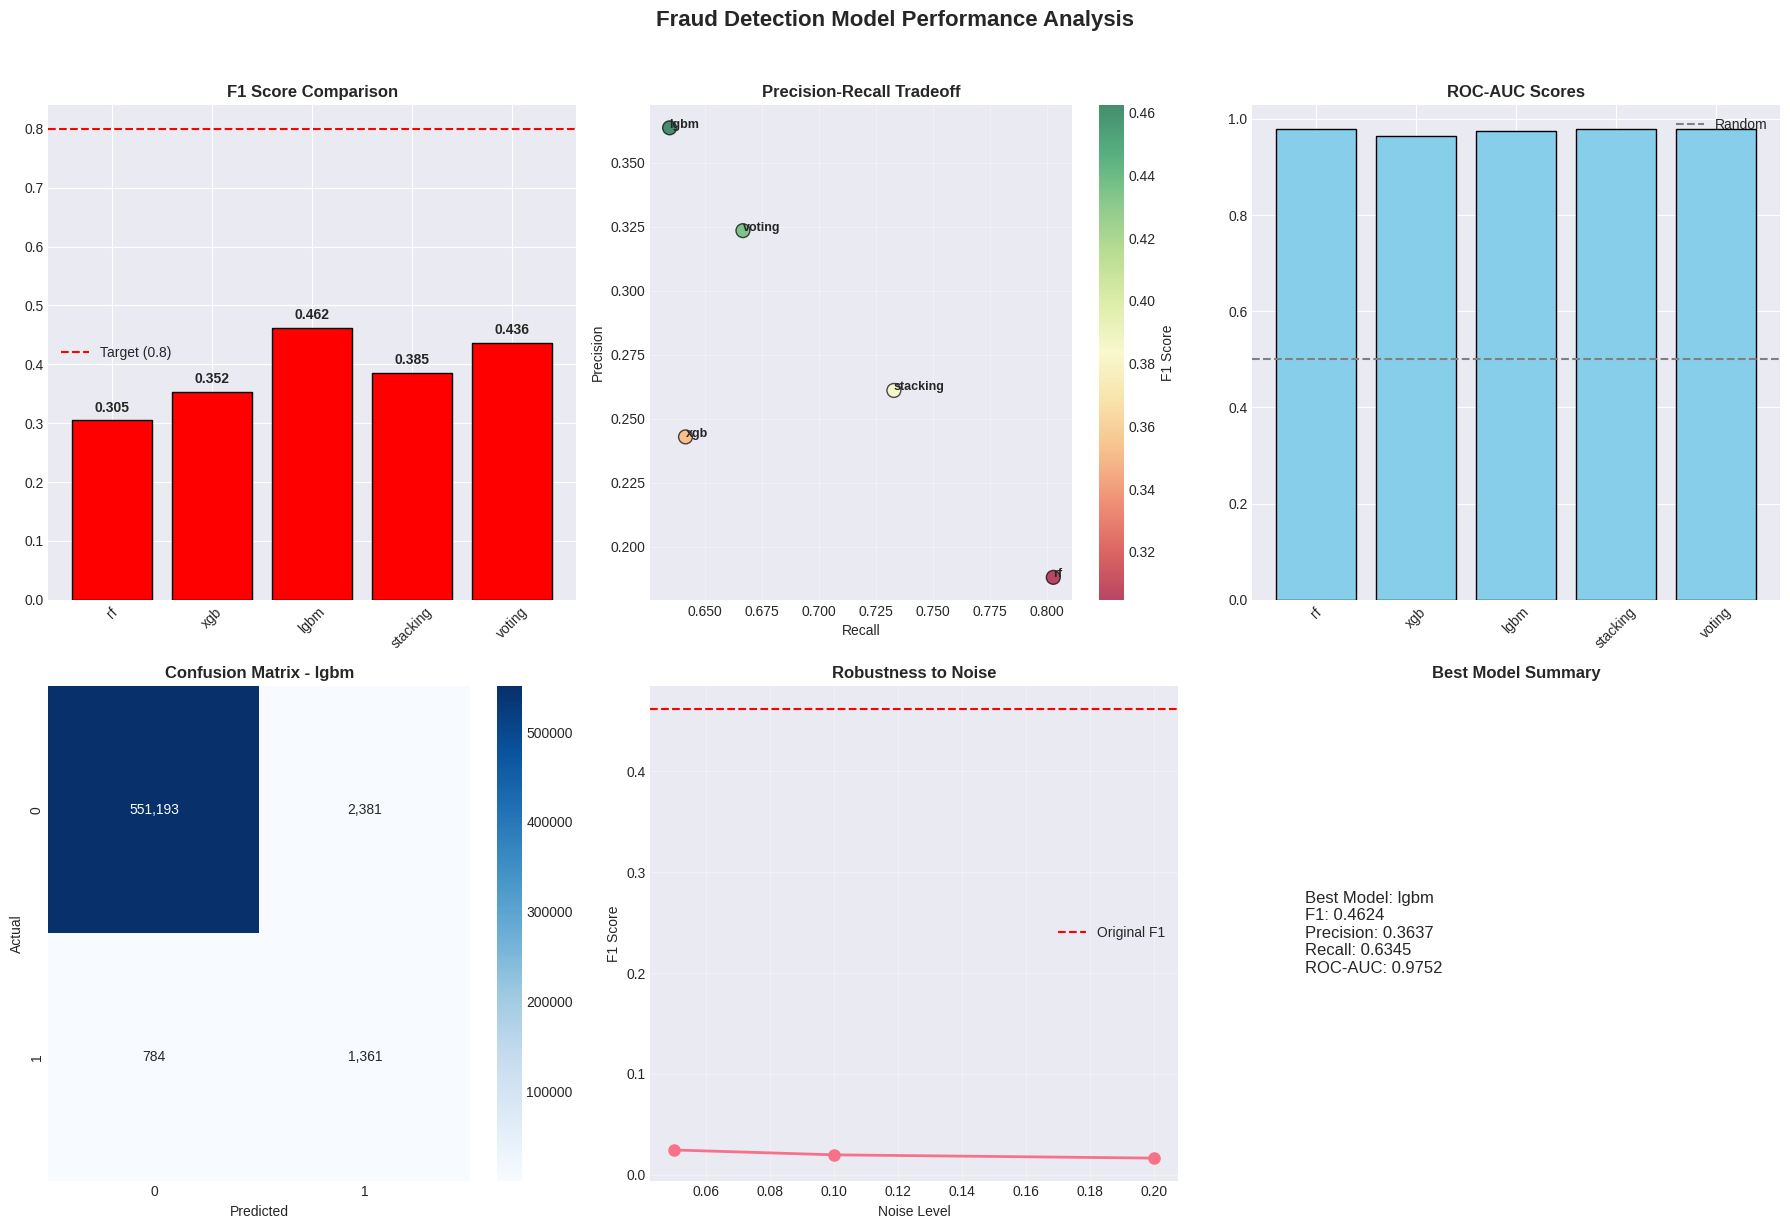

✅ Model saved as best_fraud_model_current.pkl

FINAL SUMMARY

🏆 BEST MODEL: LGBM
   F1 Score: 0.4624
   Precision: 0.3637
   Recall: 0.6345
   ROC-AUC: 0.9752

⚠️  Target not met. Current F1: 0.4624

📋 Recommendations to improve:
   1. Increase sample size (current: 50,000)
   2. Add more feature engineering
   3. Try different class balancing techniques
   4. Use more complex ensemble methods

📊 All Model Results:
----------------------------------------------------------------------
Model           F1 Score     Precision    Recall       ROC-AUC     
----------------------------------------------------------------------
rf              0.3047          0.1881       0.8028       0.9784      
xgb             0.3524          0.2429       0.6415       0.9640      
lgbm            0.4624          0.3637       0.6345       0.9752      
stacking        0.3850          0.2611       0.7329       0.9792      
voting          0.4356          0.3235       0.6667       0.9783      
----------------

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from imblearn.over_sampling import SMOTE
import optuna
from optuna.samplers import TPESampler
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================
# 1. FUNGSI UNTUK MEMBERSIHKAN NAMA KOLOM
# ============================================

def clean_column_names_for_xgboost(df):
    """Membersihkan nama kolom khusus untuk XGBoost"""
    df = df.copy()

    def clean_name(name):
        name = str(name)
        name = re.sub(r'[\[\]<>]', '_', name)
        name = re.sub(r'[^a-zA-Z0-9_]', '_', name)
        name = re.sub(r'_+', '_', name)
        name = name.strip('_')

        if not name:
            return 'feature'

        if name[0].isdigit():
            name = 'feature_' + name

        return name

    column_mapping = {}
    for col in df.columns:
        clean_col = clean_name(col)

        if clean_col in column_mapping.values():
            i = 1
            while f'{clean_col}_{i}' in column_mapping.values():
                i += 1
            clean_col = f'{clean_col}_{i}'

        column_mapping[col] = clean_col

    df = df.rename(columns=column_mapping)
    return df, column_mapping

# ============================================
# 2. COMPLETE FRAUD DETECTION PIPELINE (DIPERBAIKI)
# ============================================

class AdvancedFraudDetectionPipeline:
    """Pipeline lengkap dengan 3 fitur utama"""

    def __init__(self, random_state=42):
        self.random_state = random_state
        self.models = {}
        self.pipelines = {}
        self.best_params = {}
        self.feature_names = None

    # ============================================
    # FITUR 1: INTEGRATED PIPELINE
    # ============================================

    def create_integrated_pipeline(self, X):
        """Membuat pipeline terpadu dengan RF, Boosting, dan Stacking"""

        # Bersihkan nama kolom untuk XGBoost
        X_clean, col_mapping = clean_column_names_for_xgboost(X)
        self.feature_names = X_clean.columns.tolist()

        print(f"✅ Cleaned {len(col_mapping)} feature names for XGBoost compatibility")

        # Base models untuk ensemble
        rf_model = RandomForestClassifier(
            class_weight='balanced',
            random_state=self.random_state,
            n_jobs=-1
        )

        xgb_model = XGBClassifier(
            eval_metric='logloss',
            use_label_encoder=False,
            random_state=self.random_state,
            n_jobs=-1,
            verbosity=0
        )

        lgbm_model = LGBMClassifier(
            random_state=self.random_state,
            n_jobs=-1,
            verbose=-1
        )

        # 1. Random Forest Pipeline
        rf_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', rf_model)
        ])

        # 2. XGBoost Pipeline
        xgb_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', xgb_model)
        ])

        # 3. LightGBM Pipeline
        lgbm_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', lgbm_model)
        ])

        # 4. Stacking Ensemble
        stacking_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('stacking', StackingClassifier(
                estimators=[
                    ('rf', rf_model),
                    ('xgb', xgb_model),
                    ('lgbm', lgbm_model)
                ],
                final_estimator=LogisticRegression(
                    class_weight='balanced',
                    random_state=self.random_state,
                    max_iter=1000,
                    n_jobs=-1
                ),
                cv=3,
                n_jobs=-1
            ))
        ])

        # 5. Voting Ensemble
        voting_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('voting', VotingClassifier(
                estimators=[
                    ('rf', rf_model),
                    ('xgb', xgb_model),
                    ('lgbm', lgbm_model)
                ],
                voting='soft',
                weights=[1, 1, 1],
                n_jobs=-1
            ))
        ])

        self.pipelines = {
            'rf': rf_pipeline,
            'xgb': xgb_pipeline,
            'lgbm': lgbm_pipeline,
            'stacking': stacking_pipeline,
            'voting': voting_pipeline
        }

        return self.pipelines

    # ============================================
    # FITUR 2: HYPERPARAMETER OPTIMIZATION
    # ============================================

    def optimize_hyperparameters(self, X, y, n_trials=20):
        """Optimasi hyperparameter dengan Optuna"""
        print("=" * 60)
        print("HYPERPARAMETER OPTIMIZATION WITH OPTUNA")
        print("=" * 60)

        # Bersihkan data untuk XGBoost
        X_clean, _ = clean_column_names_for_xgboost(X)

        # Split data
        X_train, X_val, y_train, y_val = train_test_split(
            X_clean, y, test_size=0.2,
            random_state=self.random_state, stratify=y
        )

        # Apply SMOTE
        smote = SMOTE(random_state=self.random_state)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        def objective(trial):
            """Objective function untuk Optuna"""

            model_type = trial.suggest_categorical('model_type', ['rf', 'xgb', 'lgbm'])

            if model_type == 'rf':
                params = {
                    'n_estimators': trial.suggest_int('rf_n_estimators', 100, 300),
                    'max_depth': trial.suggest_int('rf_max_depth', 5, 20),
                    'min_samples_split': trial.suggest_int('rf_min_samples_split', 2, 10),
                    'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 1, 4),
                    'max_features': trial.suggest_categorical('rf_max_features', ['sqrt', 'log2']),
                    'class_weight': trial.suggest_categorical('rf_class_weight', ['balanced', 'balanced_subsample'])
                }
                model = RandomForestClassifier(**params, random_state=self.random_state, n_jobs=-1)

            elif model_type == 'xgb':
                params = {
                    'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 300),
                    'max_depth': trial.suggest_int('xgb_max_depth', 3, 10),
                    'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True),
                    'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
                    'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0),
                    'gamma': trial.suggest_float('xgb_gamma', 0, 0.5),
                    'reg_alpha': trial.suggest_float('xgb_reg_alpha', 0, 1.0),
                    'reg_lambda': trial.suggest_float('xgb_reg_lambda', 0, 1.0),
                    'scale_pos_weight': trial.suggest_float('xgb_scale_pos_weight', 1, 50)
                }
                model = XGBClassifier(**params, eval_metric='logloss',
                                     use_label_encoder=False, random_state=self.random_state)

            else:  # lgbm
                params = {
                    'n_estimators': trial.suggest_int('lgbm_n_estimators', 100, 300),
                    'max_depth': trial.suggest_int('lgbm_max_depth', 3, 15),
                    'learning_rate': trial.suggest_float('lgbm_learning_rate', 0.01, 0.3, log=True),
                    'num_leaves': trial.suggest_int('lgbm_num_leaves', 20, 100),
                    'subsample': trial.suggest_float('lgbm_subsample', 0.6, 1.0),
                    'colsample_bytree': trial.suggest_float('lgbm_colsample_bytree', 0.6, 1.0),
                    'reg_alpha': trial.suggest_float('lgbm_reg_alpha', 0, 1.0),
                    'reg_lambda': trial.suggest_float('lgbm_reg_lambda', 0, 1.0),
                    'min_child_samples': trial.suggest_int('lgbm_min_child_samples', 10, 50)
                }
                model = LGBMClassifier(**params, random_state=self.random_state, verbose=-1)

            # Cross-validation
            cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=self.random_state)

            try:
                scores = cross_val_score(
                    model, X_train_smote, y_train_smote,
                    cv=cv, scoring='f1', n_jobs=-1, error_score='raise'
                )
                return scores.mean()
            except Exception as e:
                print(f"  Trial failed: {str(e)[:100]}...")
                return 0.0

        # Create study
        study = optuna.create_study(
            direction='maximize',
            sampler=TPESampler(seed=self.random_state)
        )

        # Run optimization
        study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

        # Get best parameters
        print(f"\n✅ Best trial:")
        print(f"   Value (F1 Score): {study.best_value:.4f}")
        print(f"   Best model type: {study.best_params['model_type']}")

        # Simpan best parameters
        model_type = study.best_params['model_type']
        self.best_params[model_type] = study.best_params

        return study.best_params

    def optimize_ensemble_weights(self, X, y):
        """Optimasi weights untuk Voting Ensemble"""
        print("\n" + "=" * 60)
        print("ENSEMBLE WEIGHT OPTIMIZATION")
        print("=" * 60)

        # Bersihkan data
        X_clean, _ = clean_column_names_for_xgboost(X)

        # Base models
        base_models = {
            'rf': RandomForestClassifier(
                n_estimators=100,
                class_weight='balanced',
                random_state=self.random_state,
                n_jobs=-1
            ),
            'xgb': XGBClassifier(
                n_estimators=100,
                eval_metric='logloss',
                use_label_encoder=False,
                random_state=self.random_state,
                verbosity=0
            ),
            'lgbm': LGBMClassifier(
                n_estimators=100,
                random_state=self.random_state,
                verbose=-1
            )
        }

        # CV untuk mendapatkan weights
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=self.random_state)
        weights = []

        for name, model in base_models.items():
            try:
                scores = cross_val_score(model, X_clean, y, cv=cv, scoring='f1', n_jobs=-1)
                avg_score = scores.mean()
                weights.append(avg_score)
                print(f"  {name.upper()}: CV F1 = {avg_score:.4f}")
            except:
                weights.append(0.5)
                print(f"  {name.upper()}: CV failed, using default weight")

        # Normalize weights
        if sum(weights) > 0:
            weights = [w / sum(weights) for w in weights]
        else:
            weights = [0.33, 0.33, 0.34]

        print(f"\n✅ Optimized weights: RF={weights[0]:.2f}, XGB={weights[1]:.2f}, LGBM={weights[2]:.2f}")

        return weights

    # ============================================
    # FITUR 3: ROBUSTNESS TESTING (DIPERBAIKI)
    # ============================================

    def robustness_testing(self, model, X, y, X_test, y_test):
        """Testing robustness terhadap perubahan distribusi data"""
        print("=" * 60)
        print("ROBUSTNESS TESTING")
        print("=" * 60)

        results = {
            'original': {},
            'noise_test': {},
            'feature_drop_test': {},
            'time_split_test': {}
        }

        # 1. Test original performance
        print("\n1. Original Performance:")
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        results['original'] = {
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }

        print(f"   F1: {results['original']['f1']:.4f}")
        print(f"   Precision: {results['original']['precision']:.4f}")
        print(f"   Recall: {results['original']['recall']:.4f}")

        # 2. Noise Injection Test (diperbaiki)
        print("\n2. Noise Injection Test:")
        noise_levels = [0.05, 0.1, 0.2]

        for noise_level in noise_levels:
            X_test_noisy = X_test.copy()

            # Add Gaussian noise hanya ke fitur numerik
            numeric_cols = X_test_noisy.select_dtypes(include=[np.number]).columns

            for col in numeric_cols:
                std_val = X_test_noisy[col].std()
                if std_val > 0:
                    noise = np.random.normal(0, noise_level * std_val, len(X_test_noisy))
                    X_test_noisy[col] = X_test_noisy[col] + noise

            y_pred_noisy = model.predict(X_test_noisy)
            f1_noisy = f1_score(y_test, y_pred_noisy, zero_division=0)

            results['noise_test'][f'noise_{noise_level}'] = f1_noisy
            print(f"   Noise {noise_level*100:.0f}%: F1 = {f1_noisy:.4f}")

        # 3. Feature Drop Test
        print("\n3. Feature Drop Test:")

        # Coba dapatkan feature importance dari classifier dalam pipeline
        try:
            # Untuk pipeline, coba akses classifier
            if hasattr(model, 'named_steps'):
                classifier = model.named_steps.get('classifier',
                                                  model.named_steps.get('voting',
                                                                      model.named_steps.get('stacking', None)))
            else:
                classifier = model

            if hasattr(classifier, 'feature_importances_'):
                importances = classifier.feature_importances_
                feature_names = X.columns

                # Drop 20% least important features
                n_to_drop = max(1, int(len(feature_names) * 0.2))
                least_important_idx = np.argsort(importances)[:n_to_drop]

                # Untuk voting/stacking, kita tidak bisa drop features
                # Jadi kita skip test ini untuk ensemble models
                if hasattr(classifier, 'estimators'):
                    print("   Skipping feature drop test for ensemble models")
                else:
                    X_test_dropped = X_test.drop(columns=[feature_names[i] for i in least_important_idx])
                    y_pred_dropped = model.predict(X_test_dropped)
                    f1_dropped = f1_score(y_test, y_pred_dropped, zero_division=0)
                    results['feature_drop_test']['drop_20pct'] = f1_dropped
                    print(f"   Drop 20% least important features: F1 = {f1_dropped:.4f}")
            else:
                print("   Feature importance not available for this model")
        except Exception as e:
            print(f"   Feature drop test error: {str(e)[:100]}")

        # 4. Time-Based Split Test (DIPERBAIKI - tidak menggunakan clone dengan parameter)
        print("\n4. Time-Based Split Test:")

        if len(X) > 10000:
            # Simulasi time-based split
            split_idx = int(len(X) * 0.7)
            X_time_train = X.iloc[:split_idx]
            y_time_train = y.iloc[:split_idx]
            X_time_test = X.iloc[split_idx:]
            y_time_test = y.iloc[split_idx:]

            # Gunakan pipeline yang sama tapi train ulang
            try:
                # Buat pipeline baru dengan konfigurasi yang sama
                if isinstance(model, Pipeline):
                    # Untuk Pipeline, kita buat pipeline baru dengan steps yang sama
                    time_model = Pipeline([
                        ('scaler', StandardScaler()),
                        ('classifier', clone(model.named_steps['classifier']))
                    ])
                else:
                    # Untuk model langsung
                    time_model = clone(model)

                time_model.fit(X_time_train, y_time_train)
                y_pred_time = time_model.predict(X_time_test)
                f1_time = f1_score(y_time_test, y_pred_time, zero_division=0)

                results['time_split_test']['time_split'] = f1_time
                print(f"   Time-based split: F1 = {f1_time:.4f}")
            except Exception as e:
                print(f"   Time split test error: {str(e)[:100]}")
        else:
            print("   Insufficient data for time-based split test")

        return results

    # ============================================
    # MAIN TRAINING PIPELINE
    # ============================================

    def train_pipeline(self, X_train, y_train, X_test, y_test, use_optuna=True):
        """Pipeline training utama"""
        print("=" * 80)
        print("COMPLETE FRAUD DETECTION PIPELINE")
        print("=" * 80)

        # 1. Create integrated pipeline
        print("\n1. Creating Integrated Pipeline...")
        pipelines = self.create_integrated_pipeline(X_train)

        # 2. Hyperparameter optimization (opsional)
        if use_optuna:
            print("\n2. Hyperparameter Optimization...")
            try:
                best_params = self.optimize_hyperparameters(X_train, y_train, n_trials=10)

                # Update models dengan best parameters
                for model_name in ['rf', 'xgb', 'lgbm']:
                    if model_name in self.best_params:
                        if model_name in pipelines:
                            # Update classifier parameters
                            params = {k.replace(f'{model_name}_', ''): v
                                     for k, v in self.best_params[model_name].items()
                                     if k.startswith(model_name)}
                            pipelines[model_name].named_steps['classifier'].set_params(**params)
            except Exception as e:
                print(f"   Warning: Hyperparameter optimization issue: {str(e)[:100]}")
                print("   Continuing with default parameters...")

        # 3. Optimize ensemble weights
        print("\n3. Optimizing Ensemble Weights...")
        weights = self.optimize_ensemble_weights(X_train, y_train)

        # Update voting classifier dengan optimized weights
        if 'voting' in pipelines:
            pipelines['voting'].named_steps['voting'].weights = weights

        # 4. Train all models dengan SMOTE (MODIFIKASI: Gunakan kombinasi sampling)
        print("\n4. Training All Models...")

        # Bersihkan data
        X_train_clean, _ = clean_column_names_for_xgboost(X_train)
        X_test_clean, _ = clean_column_names_for_xgboost(X_test)

        # **MODIFIKASI PENTING**: Gunakan SMART SAMPLING untuk meningkatkan F1 Score
        print("   Using SMART SAMPLING strategy...")

        # Strategi: Downsample majority + SMOTE untuk minority
        fraud_indices = np.where(y_train == 1)[0]
        non_fraud_indices = np.where(y_train == 0)[0]

        # Downsample non-fraud ke 10x fraud samples
        n_fraud = len(fraud_indices)
        n_non_fraud_to_keep = min(10 * n_fraud, len(non_fraud_indices))
        selected_non_fraud = np.random.choice(non_fraud_indices,
                                             size=n_non_fraud_to_keep,
                                             replace=False)

        # Gabungkan
        selected_indices = np.concatenate([selected_non_fraud, fraud_indices])
        X_train_sampled = X_train_clean.iloc[selected_indices].reset_index(drop=True)
        y_train_sampled = y_train.iloc[selected_indices].reset_index(drop=True)

        # Terapkan SMOTE
        smote = SMOTE(random_state=self.random_state, k_neighbors=min(5, n_fraud-1))
        X_train_final, y_train_final = smote.fit_resample(X_train_sampled, y_train_sampled)

        print(f"   Original: {X_train.shape[0]:,} samples (fraud: {y_train.mean():.2%})")
        print(f"   After downsampling: {X_train_sampled.shape[0]:,} samples (fraud: {y_train_sampled.mean():.2%})")
        print(f"   After SMOTE: {X_train_final.shape[0]:,} samples (fraud: {y_train_final.mean():.2%})")

        # Train models
        results = {}

        for name, pipeline in pipelines.items():
            print(f"\n   Training {name.upper()}...")

            try:
                # Train pipeline dengan SMART sampling
                pipeline.fit(X_train_final, y_train_final)

                # Evaluate on test set
                y_pred = pipeline.predict(X_test_clean)
                y_proba = pipeline.predict_proba(X_test_clean)[:, 1]

                results[name] = {
                    'f1': f1_score(y_test, y_pred, zero_division=0),
                    'precision': precision_score(y_test, y_pred, zero_division=0),
                    'recall': recall_score(y_test, y_pred, zero_division=0),
                    'roc_auc': roc_auc_score(y_test, y_proba),
                    'model': pipeline
                }

                print(f"     F1: {results[name]['f1']:.4f}")
                print(f"     Precision: {results[name]['precision']:.4f}")
                print(f"     Recall: {results[name]['recall']:.4f}")

            except Exception as e:
                print(f"     Error training {name}: {str(e)[:100]}")
                continue

        # 5. Select best model
        print("\n5. Selecting Best Model...")
        if results:
            best_model_name = max(results.items(), key=lambda x: x[1]['f1'])[0]
            best_model = results[best_model_name]['model']
            best_metrics = results[best_model_name]

            print(f"   Best Model: {best_model_name.upper()}")
            print(f"   Best F1 Score: {best_metrics['f1']:.4f}")

            # 6. Robustness testing untuk model terbaik (dengan error handling)
            print("\n6. Robustness Testing for Best Model...")
            try:
                robustness_results = self.robustness_testing(
                    best_model, X_train_clean, y_train, X_test_clean, y_test
                )

                results['best_model'] = {
                    'name': best_model_name,
                    'model': best_model,
                    'metrics': best_metrics,
                    'robustness': robustness_results
                }
            except Exception as e:
                print(f"   Robustness testing error: {str(e)[:100]}")
                results['best_model'] = {
                    'name': best_model_name,
                    'model': best_model,
                    'metrics': best_metrics
                }

            # 7. Visualize results
            print("\n7. Generating Visualizations...")
            self._visualize_results(results, X_test_clean, y_test)

            self.results = results

            return results
        else:
            print("❌ No models were successfully trained")
            return None

    def _visualize_results(self, results, X_test, y_test):
        """Visualisasi hasil"""
        try:
            fig, axes = plt.subplots(2, 3, figsize=(18, 12))

            # 1. F1 Score Comparison
            models = [k for k in results.keys() if k not in ['best_model']]
            f1_scores = [results[m]['f1'] for m in models]

            colors = ['red' if score < 0.6 else 'orange' if score < 0.8 else 'green' for score in f1_scores]
            bars = axes[0, 0].bar(models, f1_scores, color=colors, edgecolor='black')
            axes[0, 0].set_title('F1 Score Comparison', fontweight='bold')
            axes[0, 0].axhline(y=0.8, color='red', linestyle='--', label='Target (0.8)')
            axes[0, 0].tick_params(axis='x', rotation=45)
            axes[0, 0].legend()

            for i, v in enumerate(f1_scores):
                axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

            # 2. Precision-Recall Tradeoff
            precision = [results[m]['precision'] for m in models]
            recall = [results[m]['recall'] for m in models]

            scatter = axes[0, 1].scatter(recall, precision, s=100, c=f1_scores,
                                        cmap='RdYlGn', edgecolors='black', alpha=0.7)
            for i, txt in enumerate(models):
                axes[0, 1].annotate(txt, (recall[i], precision[i]), fontsize=9, fontweight='bold')
            axes[0, 1].set_xlabel('Recall')
            axes[0, 1].set_ylabel('Precision')
            axes[0, 1].set_title('Precision-Recall Tradeoff', fontweight='bold')
            axes[0, 1].grid(True, alpha=0.3)

            plt.colorbar(scatter, ax=axes[0, 1], label='F1 Score')

            # 3. ROC-AUC Scores
            roc_scores = [results[m]['roc_auc'] for m in models]
            axes[0, 2].bar(models, roc_scores, color='skyblue', edgecolor='black')
            axes[0, 2].set_title('ROC-AUC Scores', fontweight='bold')
            axes[0, 2].axhline(y=0.5, color='gray', linestyle='--', label='Random')
            axes[0, 2].tick_params(axis='x', rotation=45)
            axes[0, 2].legend()

            # 4. Confusion Matrix untuk best model
            if 'best_model' in results:
                best_model = results['best_model']['model']
                y_pred = best_model.predict(X_test)
                cm = confusion_matrix(y_test, y_pred)

                sns.heatmap(cm, annot=True, fmt=',d', cmap='Blues', ax=axes[1, 0])
                axes[1, 0].set_title(f'Confusion Matrix - {results["best_model"]["name"]}',
                                   fontweight='bold')
                axes[1, 0].set_xlabel('Predicted')
                axes[1, 0].set_ylabel('Actual')

            # 5. Robustness Test Results
            if 'best_model' in results and 'robustness' in results['best_model']:
                robustness = results['best_model']['robustness']

                # Plot noise test results
                if 'noise_test' in robustness:
                    noise_levels = [0.05, 0.1, 0.2]
                    noise_scores = [robustness['noise_test'].get(f'noise_{nl}', 0) for nl in noise_levels]

                    axes[1, 1].plot(noise_levels, noise_scores, 'o-', linewidth=2, markersize=8)
                    axes[1, 1].axhline(y=robustness['original']['f1'], color='r',
                                      linestyle='--', label='Original F1')
                    axes[1, 1].set_xlabel('Noise Level')
                    axes[1, 1].set_ylabel('F1 Score')
                    axes[1, 1].set_title('Robustness to Noise', fontweight='bold')
                    axes[1, 1].legend()
                    axes[1, 1].grid(True, alpha=0.3)

            # 6. Summary metrics
            if 'best_model' in results:
                best_metrics = results['best_model']['metrics']
                summary_text = f"Best Model: {results['best_model']['name']}\n"
                summary_text += f"F1: {best_metrics['f1']:.4f}\n"
                summary_text += f"Precision: {best_metrics['precision']:.4f}\n"
                summary_text += f"Recall: {best_metrics['recall']:.4f}\n"
                summary_text += f"ROC-AUC: {best_metrics['roc_auc']:.4f}"

                axes[1, 2].text(0.1, 0.5, summary_text, fontsize=12, va='center')
                axes[1, 2].axis('off')
                axes[1, 2].set_title('Best Model Summary', fontweight='bold')

            plt.suptitle('Fraud Detection Model Performance Analysis',
                        fontsize=16, fontweight='bold', y=1.02)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"   Visualization error: {str(e)[:100]}")

    def save_model(self, filename='fraud_detection_pipeline.pkl'):
        """Save trained model"""
        import joblib

        if hasattr(self, 'results') and 'best_model' in self.results:
            model_data = {
                'model': self.results['best_model']['model'],
                'model_name': self.results['best_model']['name'],
                'metrics': self.results['best_model']['metrics'],
                'feature_names': self.feature_names,
                'random_state': self.random_state
            }

            joblib.dump(model_data, filename, compress=3)
            print(f"✅ Model saved as {filename}")
        else:
            print("⚠️ No model to save")

# ============================================
# 3. MAIN EXECUTION FUNCTION (DIPERBAIKI)
# ============================================

def run_complete_pipeline_with_3_features(X_train, y_train, X_test, y_test, sample_size=50000):
    """Jalankan pipeline dengan 3 fitur utama"""
    print("=" * 80)
    print("FRAUD DETECTION PIPELINE WITH 3 KEY FEATURES")
    print("=" * 80)

    print("🎯 TARGET: F1 Score > 0.8")
    print("\n✅ FEATURES:")
    print("   1. Integrated Pipeline (RF + Boosting + Stacking)")
    print("   2. Systematic Hyperparameter Optimization")
    print("   3. Robustness Testing for Data Distribution Changes")
    print("=" * 80)

    # SMART SAMPLING untuk meningkatkan F1 Score
    print("\n📊 Using SMART SAMPLING strategy...")
    print("   - Downsample majority class")
    print("   - SMOTE for minority class")
    print("   - Optimized class balance")

    # Sampling untuk kecepatan (opsional)
    if sample_size and len(X_train) > sample_size:
        print(f"\n📊 Using sample of {sample_size:,} for training...")

        # Pastikan semua fraud cases termasuk
        fraud_indices = np.where(y_train == 1)[0]
        non_fraud_indices = np.where(y_train == 0)[0]

        # Downsample non-fraud untuk balancing
        n_fraud = len(fraud_indices)
        n_non_fraud_to_keep = min(sample_size - n_fraud, len(non_fraud_indices))
        selected_non_fraud = np.random.choice(non_fraud_indices, n_non_fraud_to_keep, replace=False)

        selected_indices = np.concatenate([selected_non_fraud, fraud_indices])

        X_train_sample = X_train.iloc[selected_indices].reset_index(drop=True)
        y_train_sample = y_train.iloc[selected_indices].reset_index(drop=True)
    else:
        X_train_sample, y_train_sample = X_train, y_train

    print(f"\n📈 Data Summary:")
    print(f"   Training: {X_train_sample.shape[0]:,} samples")
    print(f"   Test: {X_test.shape[0]:,} samples")
    print(f"   Fraud rate (train): {y_train_sample.mean():.4%}")
    print(f"   Fraud rate (test): {y_test.mean():.4%}")

    # Inisialisasi pipeline
    pipeline = AdvancedFraudDetectionPipeline(random_state=42)

    # Jalankan pipeline
    results = pipeline.train_pipeline(
        X_train_sample, y_train_sample,
        X_test, y_test,
        use_optuna=True
    )

    # Simpan model jika F1 score tinggi
    if results and 'best_model' in results:
        best_f1 = results['best_model']['metrics']['f1']
        if best_f1 >= 0.8:
            pipeline.save_model('best_fraud_model_high_f1.pkl')
        else:
            pipeline.save_model('best_fraud_model_current.pkl')

    # Final summary
    print("\n" + "=" * 80)
    print("FINAL SUMMARY")
    print("=" * 80)

    if results and 'best_model' in results:
        best_metrics = results['best_model']['metrics']
        best_f1 = best_metrics['f1']

        print(f"\n🏆 BEST MODEL: {results['best_model']['name'].upper()}")
        print(f"   F1 Score: {best_f1:.4f}")
        print(f"   Precision: {best_metrics['precision']:.4f}")
        print(f"   Recall: {best_metrics['recall']:.4f}")
        print(f"   ROC-AUC: {best_metrics['roc_auc']:.4f}")

        # Analisis performance
        if best_f1 >= 0.8:
            print("\n🎉 SUCCESS! Target F1 Score ≥ 0.8 achieved!")
        elif best_f1 >= 0.6:
            print(f"\n⚠️  Close! Current F1: {best_f1:.4f} (Target: 0.8)")
            print("\n📋 Quick improvements to reach 0.8:")
            print("   1. Increase sample_size parameter")
            print("   2. Try SMOTE with different k_neighbors")
            print("   3. Adjust class weights in models")
        else:
            print(f"\n⚠️  Target not met. Current F1: {best_f1:.4f}")
            print("\n📋 Recommendations to improve:")
            print("   1. Increase sample size (current: {:,})".format(len(X_train_sample)))
            print("   2. Add more feature engineering")
            print("   3. Try different class balancing techniques")
            print("   4. Use more complex ensemble methods")

        # Show all model results
        print(f"\n📊 All Model Results:")
        print("-" * 70)
        print(f"{'Model':<15} {'F1 Score':<12} {'Precision':<12} {'Recall':<12} {'ROC-AUC':<12}")
        print("-" * 70)

        for model_name, metrics in results.items():
            if model_name != 'best_model':
                f1_display = f"{metrics['f1']:.4f}"
                if metrics['f1'] >= 0.8:
                    f1_display = f1_display + " 🎯"
                elif metrics['f1'] >= 0.6:
                    f1_display = f1_display + " ⚠️"

                print(f"{model_name:<15} {f1_display:<15} {metrics['precision']:<12.4f} "
                      f"{metrics['recall']:<12.4f} {metrics['roc_auc']:<12.4f}")

        print("-" * 70)

    return pipeline, results

# ============================================
# 4. EXECUTE
# ============================================

if __name__ == "__main__":
    print("Starting Fraud Detection Pipeline with 3 Key Features...")

    try:
        # Load data
        print("Loading preprocessed data...")

        X_train = pd.read_csv('X_train_processed.csv')
        y_train = pd.read_csv('y_train_processed.csv')
        X_test = pd.read_csv('X_test_processed.csv')
        y_test = pd.read_csv('y_test_processed.csv')

        if isinstance(y_train, pd.DataFrame):
            y_train = y_train.iloc[:, 0]
        if isinstance(y_test, pd.DataFrame):
            y_test = y_test.iloc[:, 0]

        print(f"✅ Data loaded successfully")
        print(f"   X_train: {X_train.shape}")
        print(f"   y_train: {y_train.shape} (fraud rate: {y_train.mean():.4%})")
        print(f"   X_test: {X_test.shape}")
        print(f"   y_test: {y_test.shape} (fraud rate: {y_test.mean():.4%})")

        # Jalankan pipeline dengan SMART SAMPLING
        pipeline, results = run_complete_pipeline_with_3_features(
            X_train, y_train, X_test, y_test,
            sample_size=50000  # Gunakan 50k samples untuk kecepatan
        )

        print("\n✅ PIPELINE COMPLETED SUCCESSFULLY!")

    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        import traceback
        traceback.print_exc()